In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from datetime import datetime as dt

import pdb

In [26]:
selector = ['UCB', 'SGV_UCB', 'MUTUAL_INFO']
selector = ['SGV_UCB']
selectors = selector
directory = 'results/'
model = 'linear'
user = 'perfect'
fake_func = 'linear'
hyper = 'no'

colors_dict = {'SGV_UCB': '#000000',
               'UCB': '#F0E442',
               'MUTUAL_INFO': '#CC79A7',
               'RANDOM': '#F0E442',
               'BAYES_INFO_GAIN_PROBIT': '#D55E00',
               'BAYES_INFO_GAIN_999': '#56B4E9',
               'ACQ_RHO': '#0072B2',
               'ACQ_LL': '#E69F00',
               'ACQ_EPIC': '#332288',
               'ACQ_SP': '#117733',
               'ACQ_SPEAR': '#AA4499',
               'SW_ACQ_RHO': '#009E73',
               'SW_ACQ_LL': '#E69F00',
               'SW_ACQ_EPIC': '#332288',
               'SW_ACQ_SP': '#117733',
               'SW_ACQ_SPEAR': '#AA4499',
               'ABS_ACQ_RHO': '#000000',
               'ABS_ACQ_LL': '#000000',
               'ABS_ACQ_EPIC': '#000000',
               'ABS_ACQ_SP': '#000000',
               'ABS_ACQ_SPEAR': '#000000'}


sig_color_dict = {'0.1': '#000000',
                  '0.2': '#009E73',
                  '0.5': '#CC79A7',
                  '1.0': '#0072B2', 
                  '10.0':'#D55E00'}

#'-','--',':','-.'
v_style_dict = {'10.0': '-',
                '80.0': '--',
                '160.0': ':'}

sig_style_dict = {'0.1': '-',
                '1.0': '--',
                '10.0': ':'}

model_style_dict = {'gp': '-',
                    'linear': '--'}


In [3]:
def filter_by_time(names, after=None, before=None):
    fmt_str = '%Y-%m-%d_%H-%M-%S'
    
    if after is not None:
        after_d = dt.strptime(after, fmt_str)
        
        if before is not None:
            # only keep values between before and after
            
            before_d = dt.strptime(before, fmt_str)
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) > after_d and dt.strptime(n[-34:-15], fmt_str) < before_d]
        else:
            # only keep values after
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) > after_d]
    else:
        if before is not None:
            # only keep names before
            before_d = dt.strptime(before, fmt_str)
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) < before_d]
        else:
            # just return everything
            filtered = names
    return filtered
        
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-09_13-22-45/train_data.npz'], '2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], '2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], before='2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], before='2024-08-07_00-25-47', after='2024-07-07_00-25-47'))

['asdagads-adsfa-dsf-adsfa-awfe-2024-08-09_13-22-45/train_data.npz']
[]
['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz']
['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz']


	results/AT_SGV_UCB_model_linear_user_perfect_fake_linear_no_env*/train_data.npz
(500, 21)
standard diffs shape: (500, 21)
(21,)


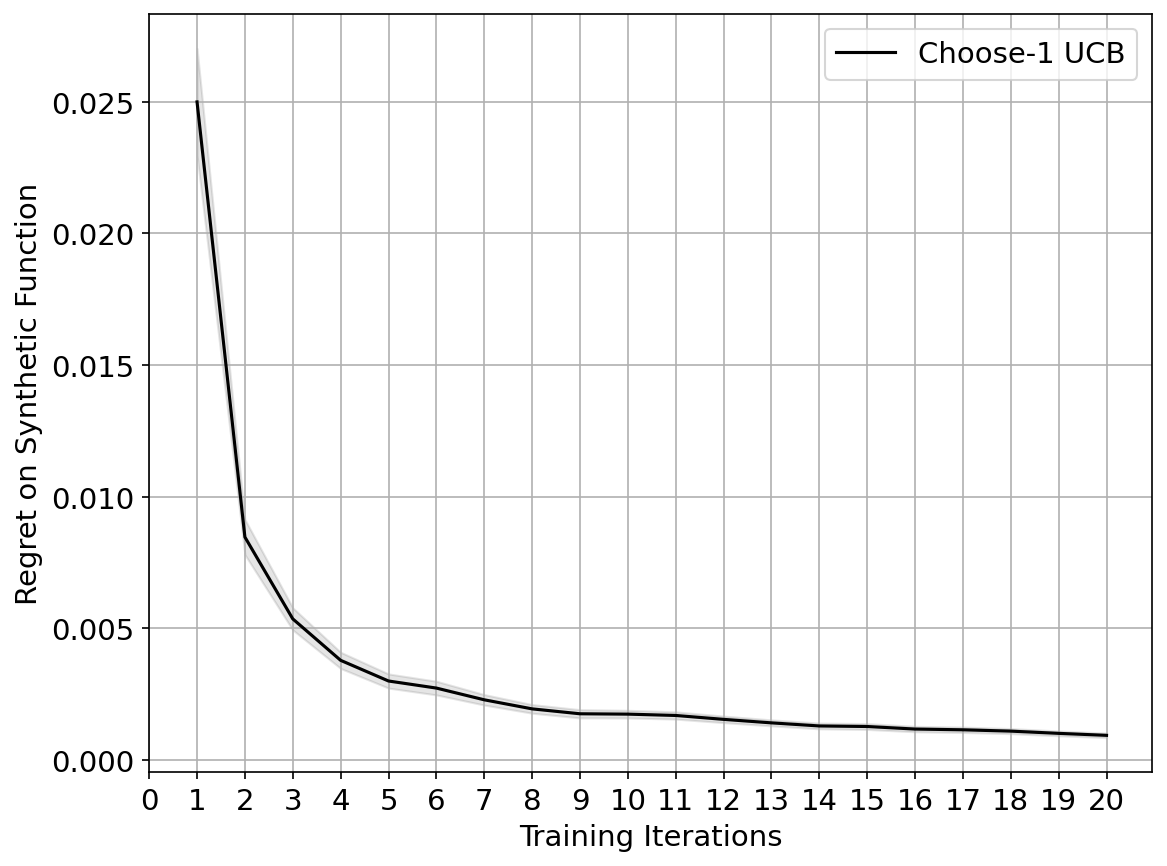

In [4]:
plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442']
#56B4E9
plt.figure(figsize=(8,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []


for i, selector in enumerate(selectors):
    glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
    #glob_check = directory+'AT_'+selector+'_env*/train_data.npz'
    print('\t'+glob_check)
    files = glob(glob_check)
    
#     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
#     files = glob(glob_check)
    
    
    score_diffs = np.empty((0,21))
    for file in files:
        data_file = np.load(file)
        #print(file)
        #print(list(data_file.keys()))
        score_diff = np.mean(data_file['score_diff'], axis=(2,))
        #score_diff = data_file['avg_correct']
        #pdb.set_trace()
        #print(file)
        #print(data_file['score_diff'].shape)
        #print(data_file['score_diff'])
        score_diffs = np.append(score_diffs, score_diff, axis=0)
        
    print(score_diffs.shape)
    all_score_diffs.append(score_diffs)
    
    itr_to_show = 21
    
    mean_diffs = np.mean(score_diffs, axis=0)
    std_diffs = np.std(score_diffs, axis=0)
    print('standard diffs shape: '+ str(score_diffs.shape))
    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
    print(mean_diffs.shape)
    
    x = np.arange(1,itr_to_show)
    
    sigma_to_plot = 1.0
    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
    plt.gca().fill_between(x, \
                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                            color=colors_dict[selector], \
                            alpha=0.1, \
                            label='_nolegend_')
    plt.plot(x, mean_diffs[1:itr_to_show], color=colors[i])

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Choose-1 Mutual Info']
plt.legend(leg_txt)

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')

plt.xticks(range(0,21))
plt.grid(True)

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()

In [5]:
print(all_score_diffs[0].shape)

(500, 21)


	results/AT_RANDOM_model_linear_user_perfect_fake_linear_no_env*/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_linear_no_env1_2024-04-09_19-37-43/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_linear_no_env3_2024-04-09_19-37-43/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_linear_no_env2_2024-04-09_19-37-43/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_linear_no_env9_2024-04-09_19-37-43/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_linear_no_env5_2024-04-09_19-37-43/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_linear_no_env8_2024-04-09_19-37-43/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_linear_no_env7_2024-04-09_19-37-43/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_linear_no_env4_2024-04-09_19-37-43/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_linear_no_env6_2024-04-09_19-37-43/train_data.npz
results/AT_RANDOM_model_linea

results/AT_RANDOM_model_linear_user_perfect_fake_max_no_env0_2024-04-12_15-11-12/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_max_no_env8_2024-04-12_15-11-12/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_max_no_env1_2024-04-12_15-11-12/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_max_no_env9_2024-04-12_15-11-12/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_max_no_env5_2024-04-12_15-11-12/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_max_no_env2_2024-04-12_15-11-12/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_max_no_env4_2024-04-12_15-11-12/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_max_no_env7_2024-04-12_15-11-12/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_max_no_env3_2024-04-12_15-11-12/train_data.npz
results/AT_RANDOM_model_linear_user_perfect_fake_max_no_env6_2024-04-12_15-11-12/train_data.npz
(500, 21)
standard diffs shape: (500, 21

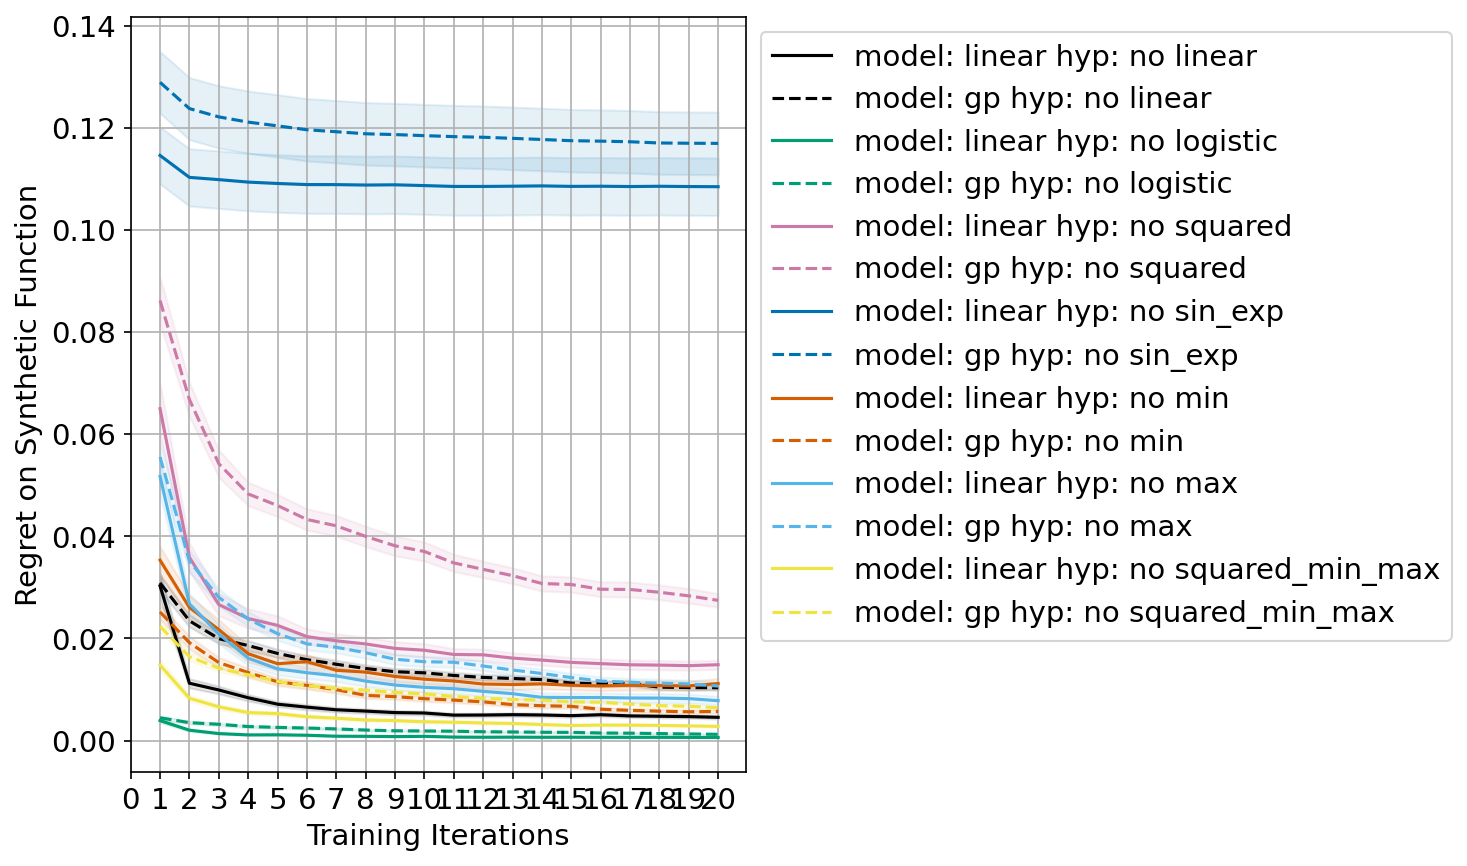

In [6]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_UCB']
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
selectors = ['MUTUAL_INFO']
selector = 'RANDOM'
user_types = ['perfect', 'human_choice']
user_types = ['perfect']
user = 'perfect'

models = ['linear', 'gp']
fake_funcs = ['linear', 'logistic', 'squared', 'sin_exp', 'min', 'max', 'squared_min_max']
hypers = ['no']

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(10,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, hyper in enumerate(hypers):
        for k, model in enumerate(models):
            glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
            print('\t'+glob_check)
            files = glob(glob_check)

            if len(files) > 0:
            #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
            #     files = glob(glob_check)


                score_diffs = np.empty((0,21))
                for file in files:
                    data_file = np.load(file)
                    print(file)
                    #print(list(data_file.keys()))
                    score_diff = np.mean(data_file['score_diff'], axis=(2,))
                    #score_diff = data_file['avg_correct']
                    score_diffs = np.append(score_diffs, score_diff, axis=0)

                print(score_diffs.shape)
                all_score_diffs.append(score_diffs)

                itr_to_show = 21

                mean_diffs = np.mean(score_diffs, axis=0)
                std_diffs = np.std(score_diffs, axis=0)
                print('standard diffs shape: '+ str(score_diffs.shape))
                std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                print(mean_diffs.shape)

                x = np.arange(1,itr_to_show)

                sigma_to_plot = 1.0
                #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                plt.gca().fill_between(x, \
                                        mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                        mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                        color=colors[j], \
                                        alpha=0.1, \
                                        label='_nolegend_')
                plt.plot(x, mean_diffs[1:itr_to_show], color=colors[j], linestyle=linestyles[line_style_idx])

                leg = 'model: '+model+' hyp: ' + hyper+ ' '+fake_func
                leg_txt.append(leg)
                
                color_idx += 1
                line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0)) 



plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()

plt.savefig('synthetic_training.png')

plt.show()

results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env2_2024-05-18_16-26-50/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env7_2024-05-18_16-26-50/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env2_2024-04-09_23-06-19/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env1_2024-05-18_16-26-50/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env4_2024-04-09_23-06-19/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env8_2024-05-18_16-26-50/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env1_2024-04-09_23-06-20/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env3_2024-04-09_23-06-19/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env6_2024-05-18_16-26-50/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env7_2024-04-09_23-06-19/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect

results/AT_SGV_UCB_model_gp_user_perfect_fake_sin_exp_no_env3_2024-04-10_03-50-29/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_sin_exp_no_env2_2024-04-10_03-50-29/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_sin_exp_no_env4_2024-04-10_03-50-29/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_sin_exp_no_env8_2024-04-10_03-50-29/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_sin_exp_no_env7_2024-04-10_03-50-29/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_sin_exp_no_env9_2024-04-10_03-50-29/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_sin_exp_no_env6_2024-04-10_03-50-29/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_sin_exp_no_env5_2024-04-10_03-50-29/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_sin_exp_no_env0_2024-04-10_03-50-29/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_sin_exp_no_env1_2024-04-10_03-50-29/train_data.npz
(500, 21)
standard diffs shape

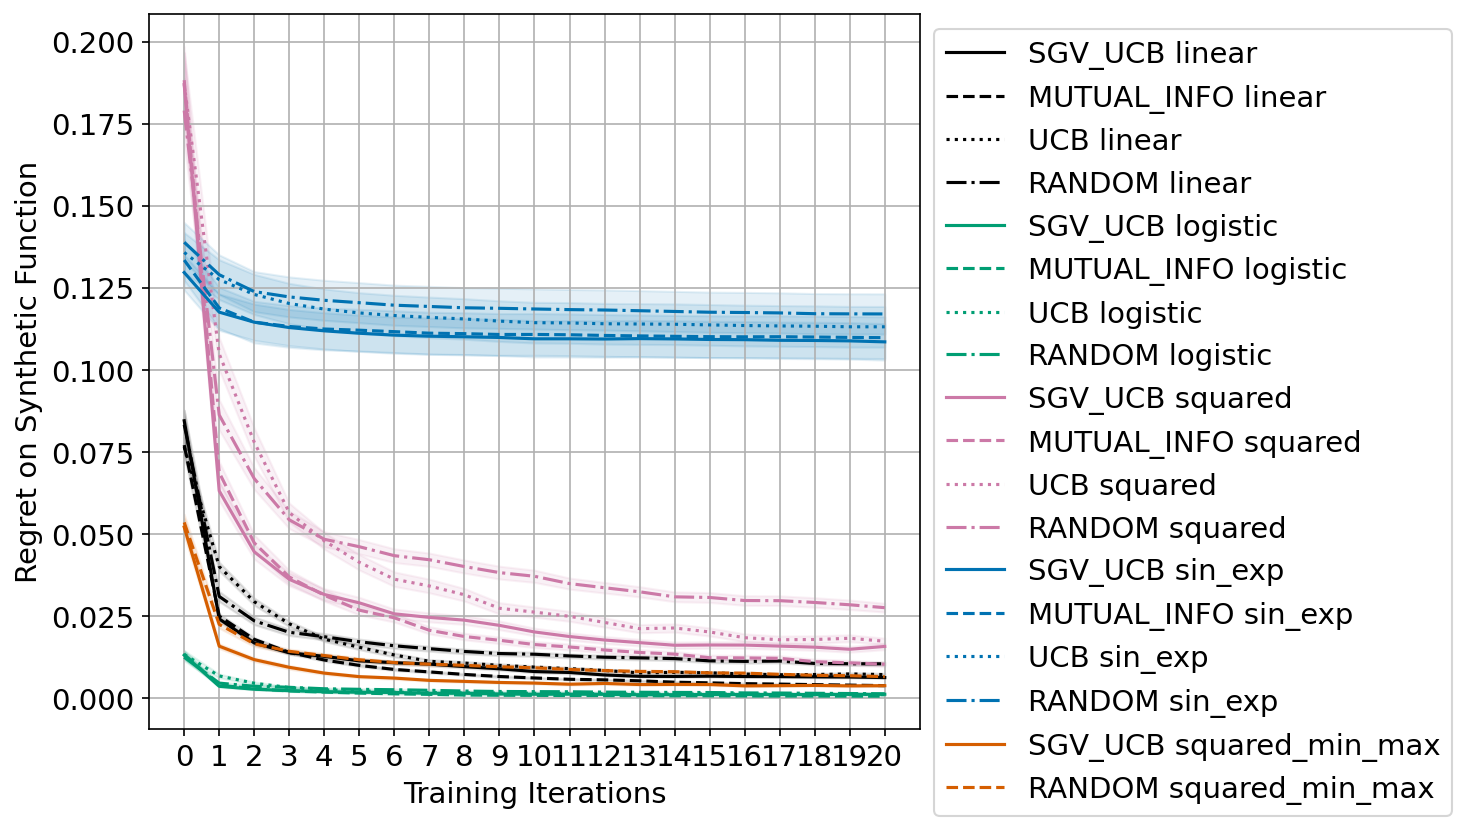

In [7]:
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'UCB', 'RANDOM']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

models = ['gp']
user = 'perfect'
fake_funcs = ['linear', 'logistic', 'squared', 'sin_exp', 'squared_min_max']
#fake_funcs = ['linear']
hypers = ['no']
hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(10,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for k, model in enumerate(models):
            glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
            #print('\t'+glob_check)
            files = glob(glob_check)

            if len(files) > 0:
            #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
            #     files = glob(glob_check)


                score_diffs = np.empty((0,21))
                for file in files:
                    data_file = np.load(file)
                    print(file)
                    #print(list(data_file.keys()))
                    score_diff = np.mean(data_file['score_diff'], axis=(2,))
                    #score_diff = data_file['avg_correct']
                    score_diffs = np.append(score_diffs, score_diff, axis=0)

                print(score_diffs.shape)
                all_score_diffs.append(score_diffs)

                itr_to_show = 21

                mean_diffs = np.mean(score_diffs, axis=0)
                std_diffs = np.std(score_diffs, axis=0)
                print('standard diffs shape: '+ str(score_diffs.shape))
                std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                print(mean_diffs.shape)

                x = np.arange(0,itr_to_show)

                sigma_to_plot = 1.0
                #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                plt.gca().fill_between(x, \
                                        mean_diffs[0:itr_to_show]-(sigma_to_plot*std_error_mean[0:itr_to_show]), \
                                        mean_diffs[0:itr_to_show]+(sigma_to_plot*std_error_mean[0:itr_to_show]), \
                                        color=colors[j], \
                                        alpha=0.1, \
                                        label='_nolegend_')
                plt.plot(x, mean_diffs[0:itr_to_show], color=colors[j], linestyle=linestyles[line_style_idx])

                leg = selector +' '+fake_func
                leg_txt.append(leg)
                
                color_idx += 1
                line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()

results/AT_RANDOM_model_gp_user_perfect_fake_min_no_env6_2024-04-12_13-09-35/train_data.npz
results/AT_RANDOM_model_gp_user_perfect_fake_min_no_env3_2024-04-12_13-09-35/train_data.npz
results/AT_RANDOM_model_gp_user_perfect_fake_min_no_env5_2024-04-12_13-09-35/train_data.npz
results/AT_RANDOM_model_gp_user_perfect_fake_min_no_env0_2024-04-12_13-09-35/train_data.npz
results/AT_RANDOM_model_gp_user_perfect_fake_min_no_env9_2024-04-12_13-09-35/train_data.npz
results/AT_RANDOM_model_gp_user_perfect_fake_min_no_env4_2024-04-12_13-09-35/train_data.npz
results/AT_RANDOM_model_gp_user_perfect_fake_min_no_env2_2024-04-12_13-09-35/train_data.npz
results/AT_RANDOM_model_gp_user_perfect_fake_min_no_env7_2024-04-12_13-09-35/train_data.npz
results/AT_RANDOM_model_gp_user_perfect_fake_min_no_env1_2024-04-12_13-09-35/train_data.npz
results/AT_RANDOM_model_gp_user_perfect_fake_min_no_env8_2024-04-12_13-09-35/train_data.npz
(500, 21)
standard diffs shape: (500, 21)
(21,)
results/AT_RANDOM_model_linear_u

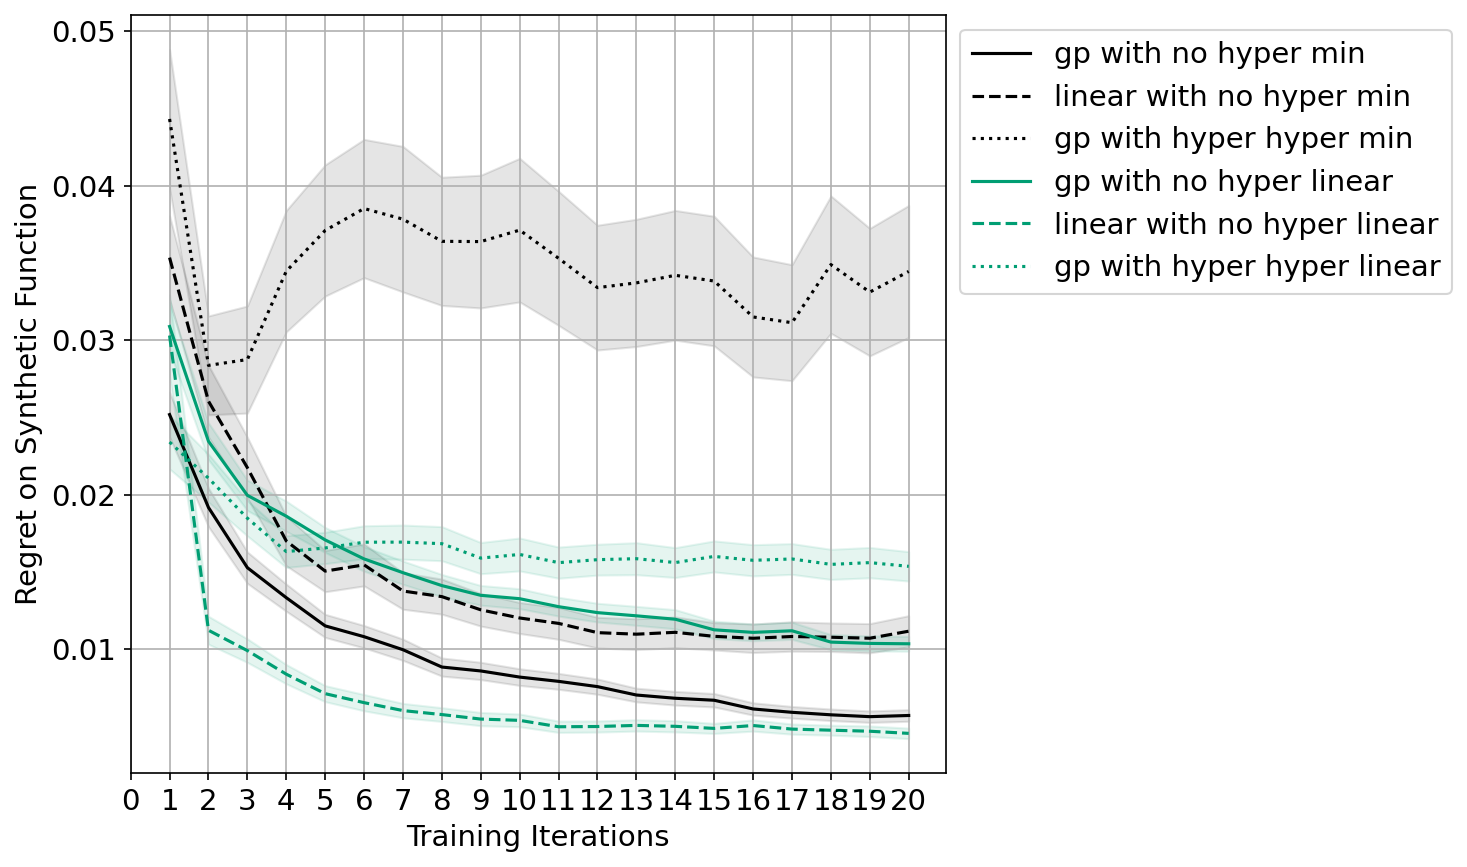

In [8]:
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'UCB', 'RANDOM']
selectors = ['RANDOM']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

models = ['gp', 'linear']
user = 'perfect'
fake_funcs = ['min', 'linear']#,'logistic', 'squared', 'sin_exp']
hypers = ['no', 'hyper']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(10,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
                #print('\t'+glob_check)
                files = glob(glob_check)

                if len(files) > 0:
                #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                #     files = glob(glob_check)


                    score_diffs = np.empty((0,21))
                    for file in files:
                        data_file = np.load(file)
                        print(file)
                        #print(list(data_file.keys()))
                        score_diff = np.mean(data_file['score_diff'], axis=(2,))
                        #score_diff = data_file['avg_correct']
                        score_diffs = np.append(score_diffs, score_diff, axis=0)

                    print(score_diffs.shape)
                    all_score_diffs.append(score_diffs)

                    itr_to_show = 21

                    mean_diffs = np.mean(score_diffs, axis=0)
                    std_diffs = np.std(score_diffs, axis=0)
                    print('standard diffs shape: '+ str(score_diffs.shape))
                    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                    print(mean_diffs.shape)

                    x = np.arange(1,itr_to_show)

                    sigma_to_plot = 1.0
                    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                    plt.gca().fill_between(x, \
                                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            color=colors[j], \
                                            alpha=0.1, \
                                            label='_nolegend_')
                    plt.plot(x, mean_diffs[1:itr_to_show], color=colors[j], linestyle=linestyles[line_style_idx])

                    leg = model +' with '+hyper+' hyper '+fake_func
                    leg_txt.append(leg)

                    color_idx += 1
                    line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()

results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env2_2024-05-18_16-26-50/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env7_2024-05-18_16-26-50/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env2_2024-04-09_23-06-19/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env1_2024-05-18_16-26-50/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env4_2024-04-09_23-06-19/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env8_2024-05-18_16-26-50/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env1_2024-04-09_23-06-20/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env3_2024-04-09_23-06-19/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env6_2024-05-18_16-26-50/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_linear_no_env7_2024-04-09_23-06-19/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect

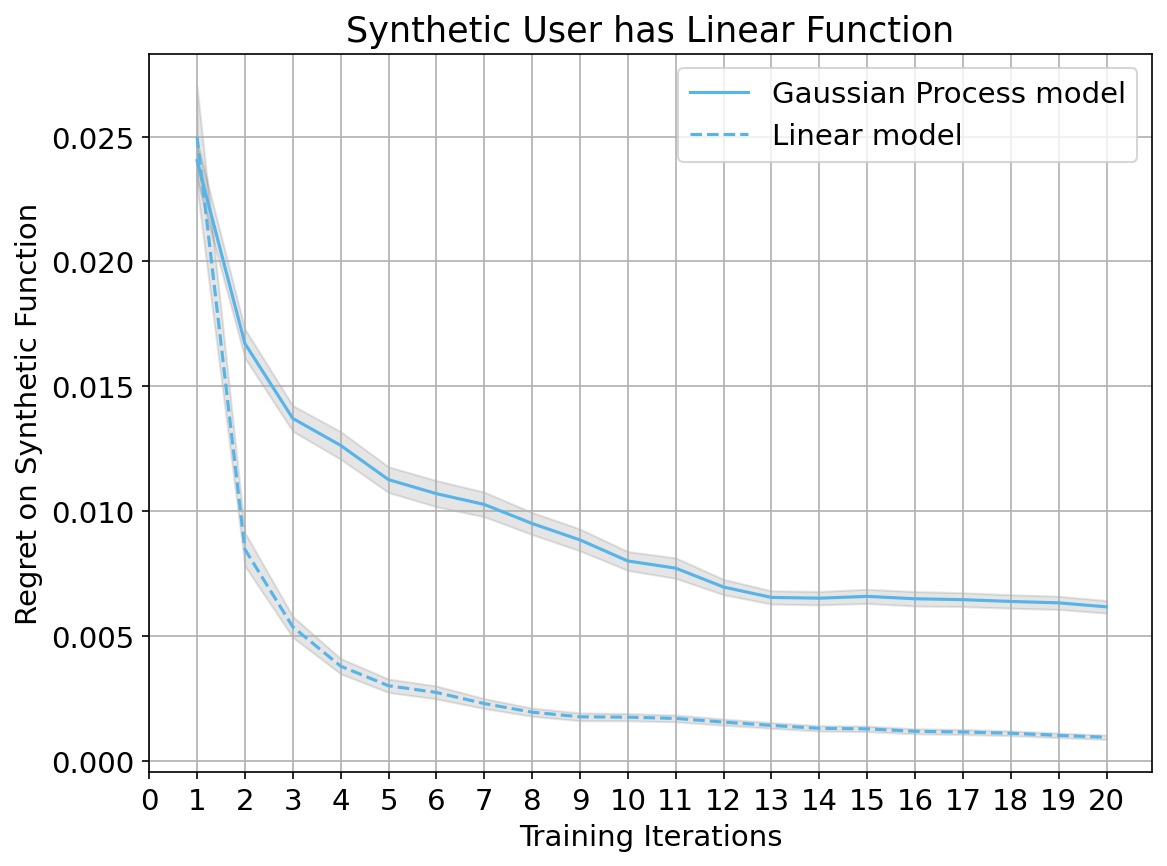

In [9]:
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'UCB', 'RANDOM']
selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

models = ['gp', 'linear']
user = 'perfect'
fake_funcs = ['linear']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(8,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
                #print('\t'+glob_check)
                files = glob(glob_check)

                if len(files) > 0:
                #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                #     files = glob(glob_check)


                    score_diffs = np.empty((0,21))
                    for file in files:
                        data_file = np.load(file)
                        print(file)
                        #print(list(data_file.keys()))
                        score_diff = np.mean(data_file['score_diff'], axis=(2,))
                        #score_diff = data_file['avg_correct']
                        score_diffs = np.append(score_diffs, score_diff, axis=0)

                    print(score_diffs.shape)
                    all_score_diffs.append(score_diffs)

                    itr_to_show = 21

                    mean_diffs = np.mean(score_diffs, axis=0)
                    std_diffs = np.std(score_diffs, axis=0)
                    print('standard diffs shape: '+ str(score_diffs.shape))
                    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                    print(mean_diffs.shape)

                    x = np.arange(1,itr_to_show)

                    sigma_to_plot = 1.0
                    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                    plt.gca().fill_between(x, \
                                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            color=colors[j], \
                                            alpha=0.1, \
                                            label='_nolegend_')
                    plt.plot(x, mean_diffs[1:itr_to_show], color=colors[5], linestyle=linestyles[line_style_idx])

                    model_text = ''
                    if model == 'gp':
                        model_text = 'Gaussian Process'
                    elif model == 'linear':
                        model_text = 'Linear'
                    leg = model_text + ' model'
                    leg_txt.append(leg)

                    color_idx += 1
                    line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Synthetic User has Linear Function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()

results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env7_2024-05-18_15-41-26/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env2_2024-05-18_15-41-26/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env5_2024-05-18_15-41-26/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env5_2024-04-24_18-59-12/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env9_2024-05-18_15-41-26/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env1_2024-04-24_18-59-12/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env8_2024-05-18_15-41-26/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env7_2024-04-24_18-59-12/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env1_2024-05-18_15-41-26/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env0_2024-04-24_18-59-12/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env4_2024-05-18_1

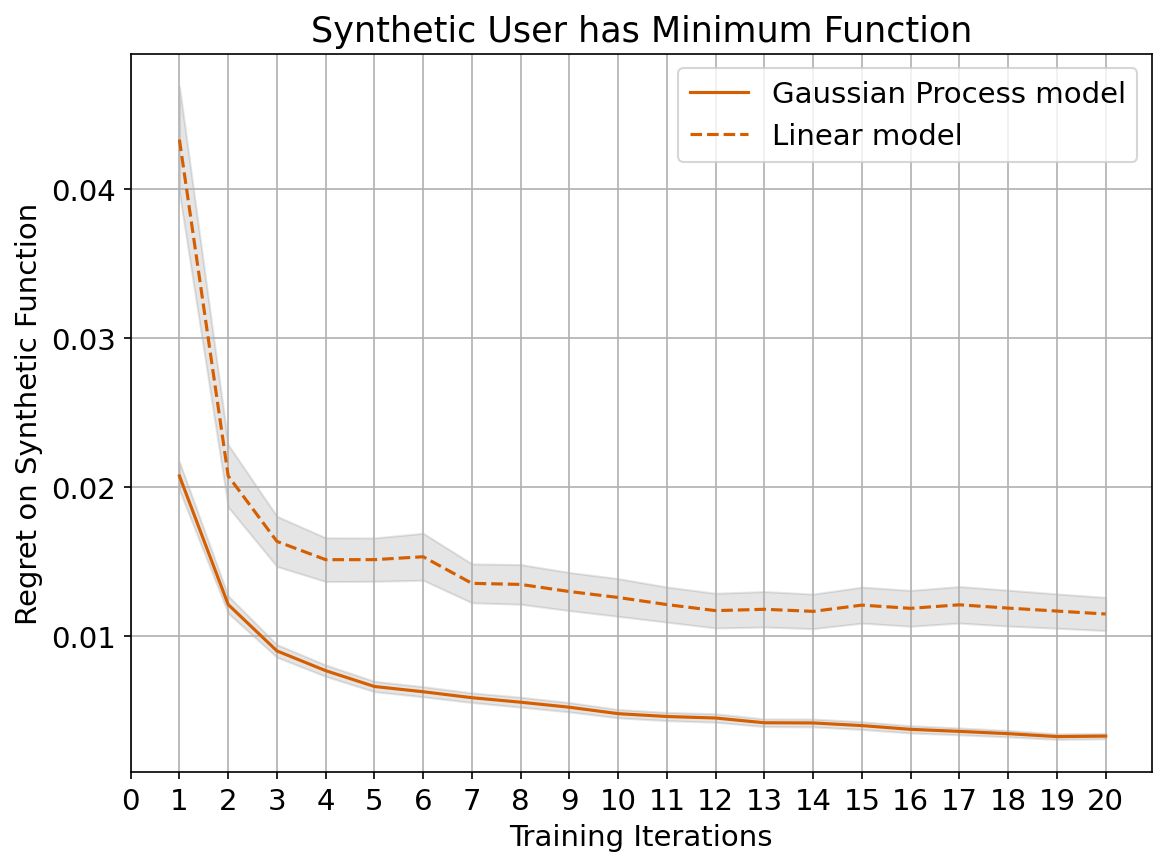

In [10]:
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'UCB', 'RANDOM']
selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

models = ['gp', 'linear']
user = 'perfect'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(8,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
                #print('\t'+glob_check)
                files = glob(glob_check)

                if len(files) > 0:
                #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                #     files = glob(glob_check)


                    score_diffs = np.empty((0,21))
                    for file in files:
                        data_file = np.load(file)
                        print(file)
                        #print(list(data_file.keys()))
                        score_diff = np.mean(data_file['score_diff'], axis=(2,))
                        #score_diff = data_file['avg_correct']
                        score_diffs = np.append(score_diffs, score_diff, axis=0)

                    print(score_diffs.shape)
                    all_score_diffs.append(score_diffs)

                    itr_to_show = 21

                    mean_diffs = np.mean(score_diffs, axis=0)
                    std_diffs = np.std(score_diffs, axis=0)
                    print('standard diffs shape: '+ str(score_diffs.shape))
                    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                    print(mean_diffs.shape)

                    x = np.arange(1,itr_to_show)

                    sigma_to_plot = 1.0
                    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                    plt.gca().fill_between(x, \
                                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            color=colors[j], \
                                            alpha=0.1, \
                                            label='_nolegend_')
                    plt.plot(x, mean_diffs[1:itr_to_show], color=colors[4], linestyle=linestyles[line_style_idx])

                    model_text = ''
                    if model == 'gp':
                        model_text = 'Gaussian Process'
                    elif model == 'linear':
                        model_text = 'Linear'
                    leg = model_text + ' model'# learning ' + fake_func + ' function'
                    leg_txt.append(leg)

                    color_idx += 1
                    line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Synthetic User has Minimum Function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()

	results/AT_SGV_UCB_model_gp_user_perfect_fake_min_pareto_True_no_env*/train_data.npz
	results/AT_UCB_model_gp_user_perfect_fake_min_pareto_True_no_env*/train_data.npz
	results/AT_MUTUAL_INFO_model_gp_user_perfect_fake_min_pareto_True_no_env*/train_data.npz
	results/AT_RANDOM_model_gp_user_perfect_fake_min_pareto_True_no_env*/train_data.npz
	results/AT_BAYES_INFO_GAIN_PROBIT_model_gp_user_perfect_fake_min_pareto_True_no_env*/train_data.npz
	results/AT_BAYES_INFO_GAIN_999_model_gp_user_perfect_fake_min_pareto_True_no_env*/train_data.npz
	results/AT_ACQ_RHO_model_gp_user_perfect_fake_min_pareto_True_no_env*/train_data.npz
	results/AT_ACQ_LL_model_gp_user_perfect_fake_min_pareto_True_no_env*/train_data.npz
	results/AT_ACQ_EPIC_model_gp_user_perfect_fake_min_pareto_True_no_env*/train_data.npz
	results/AT_ACQ_SP_model_gp_user_perfect_fake_min_pareto_True_no_env*/train_data.npz
	results/AT_ACQ_SPEAR_model_gp_user_perfect_fake_min_pareto_True_no_env*/train_data.npz
[]


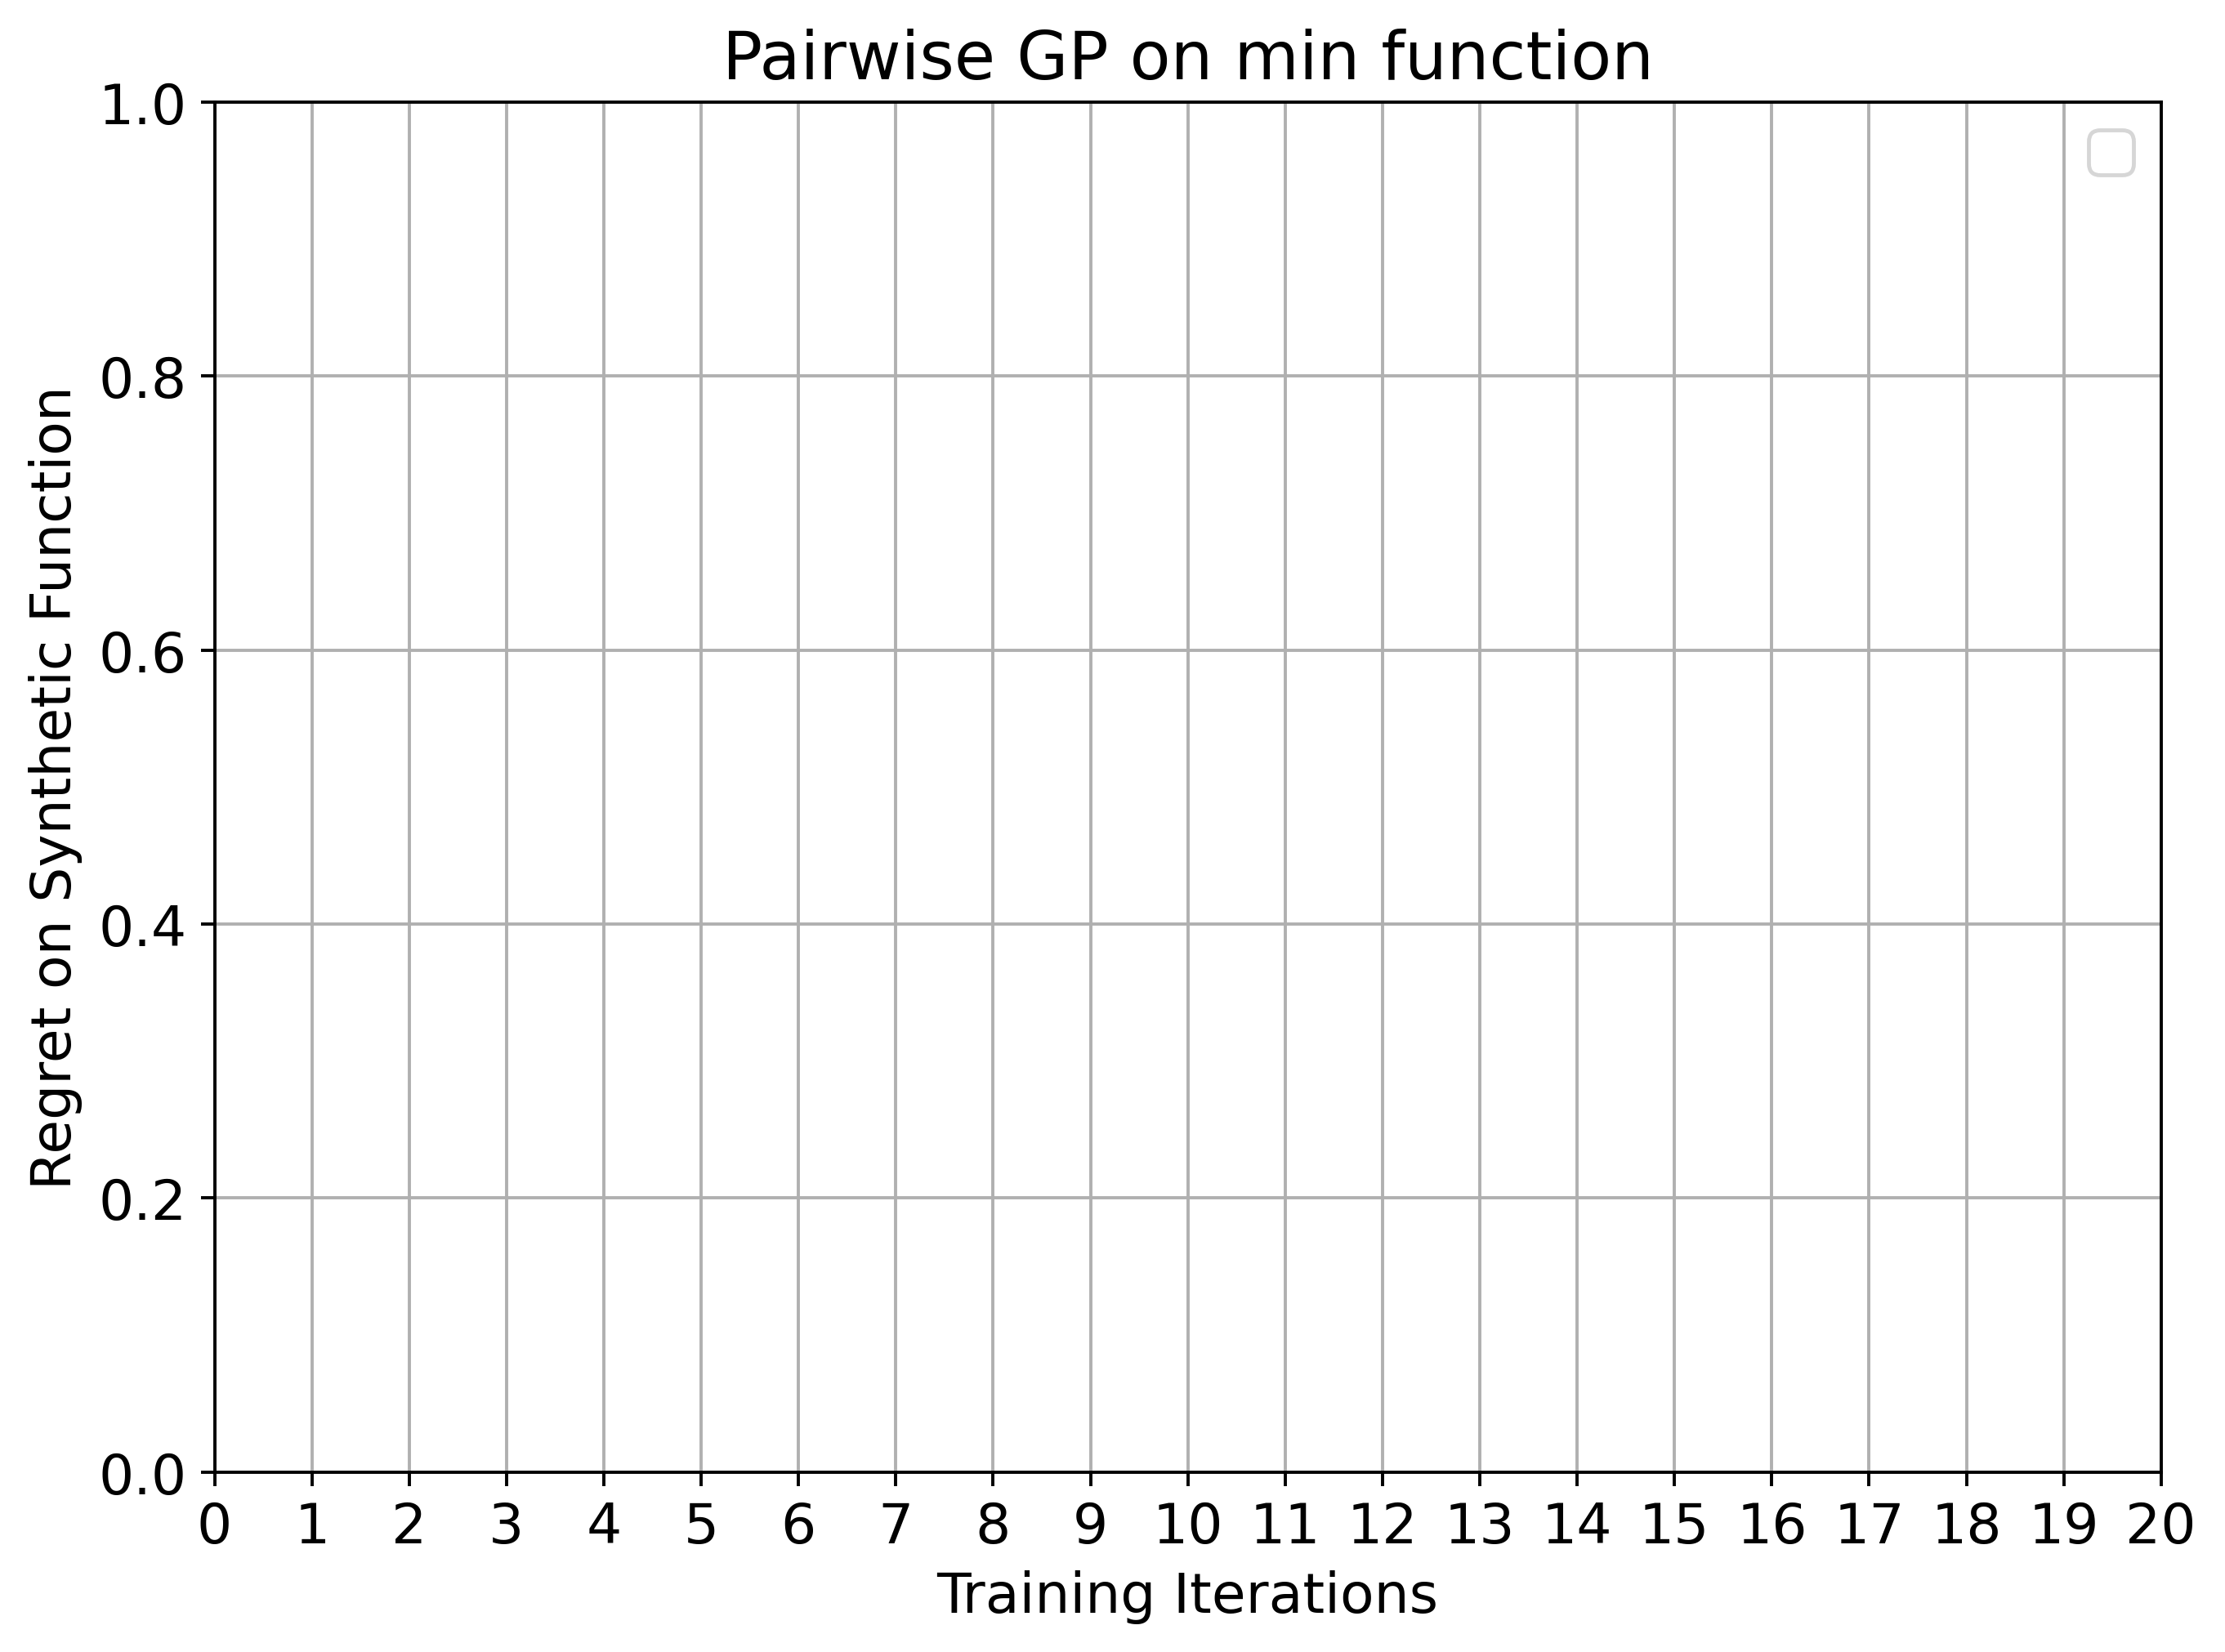

In [11]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']
#selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

before_time = '2024-08-07_00-00-00'
after_time = '2024-08-01_00-00-00'

pareto='True'

models = ['gp']
user = 'perfect'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
#selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']

colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00', '#00ff00', '#0000FF']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(8,6), dpi=350)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_pareto_'+pareto+'_'+hyper+'_env*/train_data.npz'
                print('\t'+glob_check)
                files = glob(glob_check)
                files = filter_by_time(files, before=before_time, after=after_time)
                
                if len(files) > 0:
                #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                #     files = glob(glob_check)


                    score_diffs = np.empty((0,21))
                    for file in files:
                        data_file = np.load(file)
                        print(file)
                        #print(list(data_file.keys()))
                        score_diff = np.mean(data_file['score_diff'], axis=(2,))
                        #score_diff = data_file['avg_correct']
                        score_diffs = np.append(score_diffs, score_diff, axis=0)

                    print(score_diffs.shape)
                    all_score_diffs.append(score_diffs)

                    itr_to_show = 21

                    mean_diffs = np.mean(score_diffs, axis=0)
                    std_diffs = np.std(score_diffs, axis=0)
                    print('standard diffs shape: '+ str(score_diffs.shape))
                    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                    print(mean_diffs.shape)

                    x = np.arange(1,itr_to_show)

                    sigma_to_plot = 1.0
                    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                    plt.gca().fill_between(x, \
                                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            color=colors[j], \
                                            alpha=0.1, \
                                            label='_nolegend_')
                    plt.plot(x, mean_diffs[1:itr_to_show], color=colors_dict[selector], linestyle=linestyles[0])

                    selector_text = ''
                    if selector == 'SGV_UCB':
                        selector_text = 'SGV-UCB'
                    elif selector == 'UCB':
                        selector_text = 'UCB'
                    elif selector == 'MUTUAL_INFO':
                        selector_text = 'Mutual Information'
                    elif selector == 'RANDOM':
                        selector_text = 'Random'
                    elif selector == 'BAYES_INFO_GAIN_PROBIT':
                        selector_text = 'Reward Optimization'
                    elif selector == 'ACQ_RHO':
                        selector_text = 'Acquisition-rho'
                    elif selector == 'ACQ_LL':
                        selector_text = 'Acquisition loglikelihood'
                    elif selector == 'ACQ_EPIC':
                        selector_text = 'Acquisition EPICish'
                    elif selector == 'ACQ_SP':
                        selector_text = 'Acquisition Spearman old'
                    elif selector == 'ACQ_SPEAR':
                        selector_text = 'Acquisition Spearman'
                    leg = selector_text + ' Query Selection'
                    leg_txt.append(leg)

                    color_idx += 1
                    line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Pairwise GP on min function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()

	results/AT_SGV_UCB_model_gp_user_perfect_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_UCB_model_gp_user_perfect_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_MUTUAL_INFO_model_gp_user_perfect_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_RANDOM_model_gp_user_perfect_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_BAYES_INFO_GAIN_PROBIT_model_gp_user_perfect_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_BAYES_INFO_GAIN_999_model_gp_user_perfect_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_ACQ_RHO_model_gp_user_perfect_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_ACQ_LL_model_gp_user_perfect_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_ACQ_EPIC_model_gp_user_perfect_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_ACQ_SP_model_gp_user_perfect_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_ACQ_SPEAR_model_gp_user_perfect_fake_min_pareto_False_no_env*/train_data.npz
[]


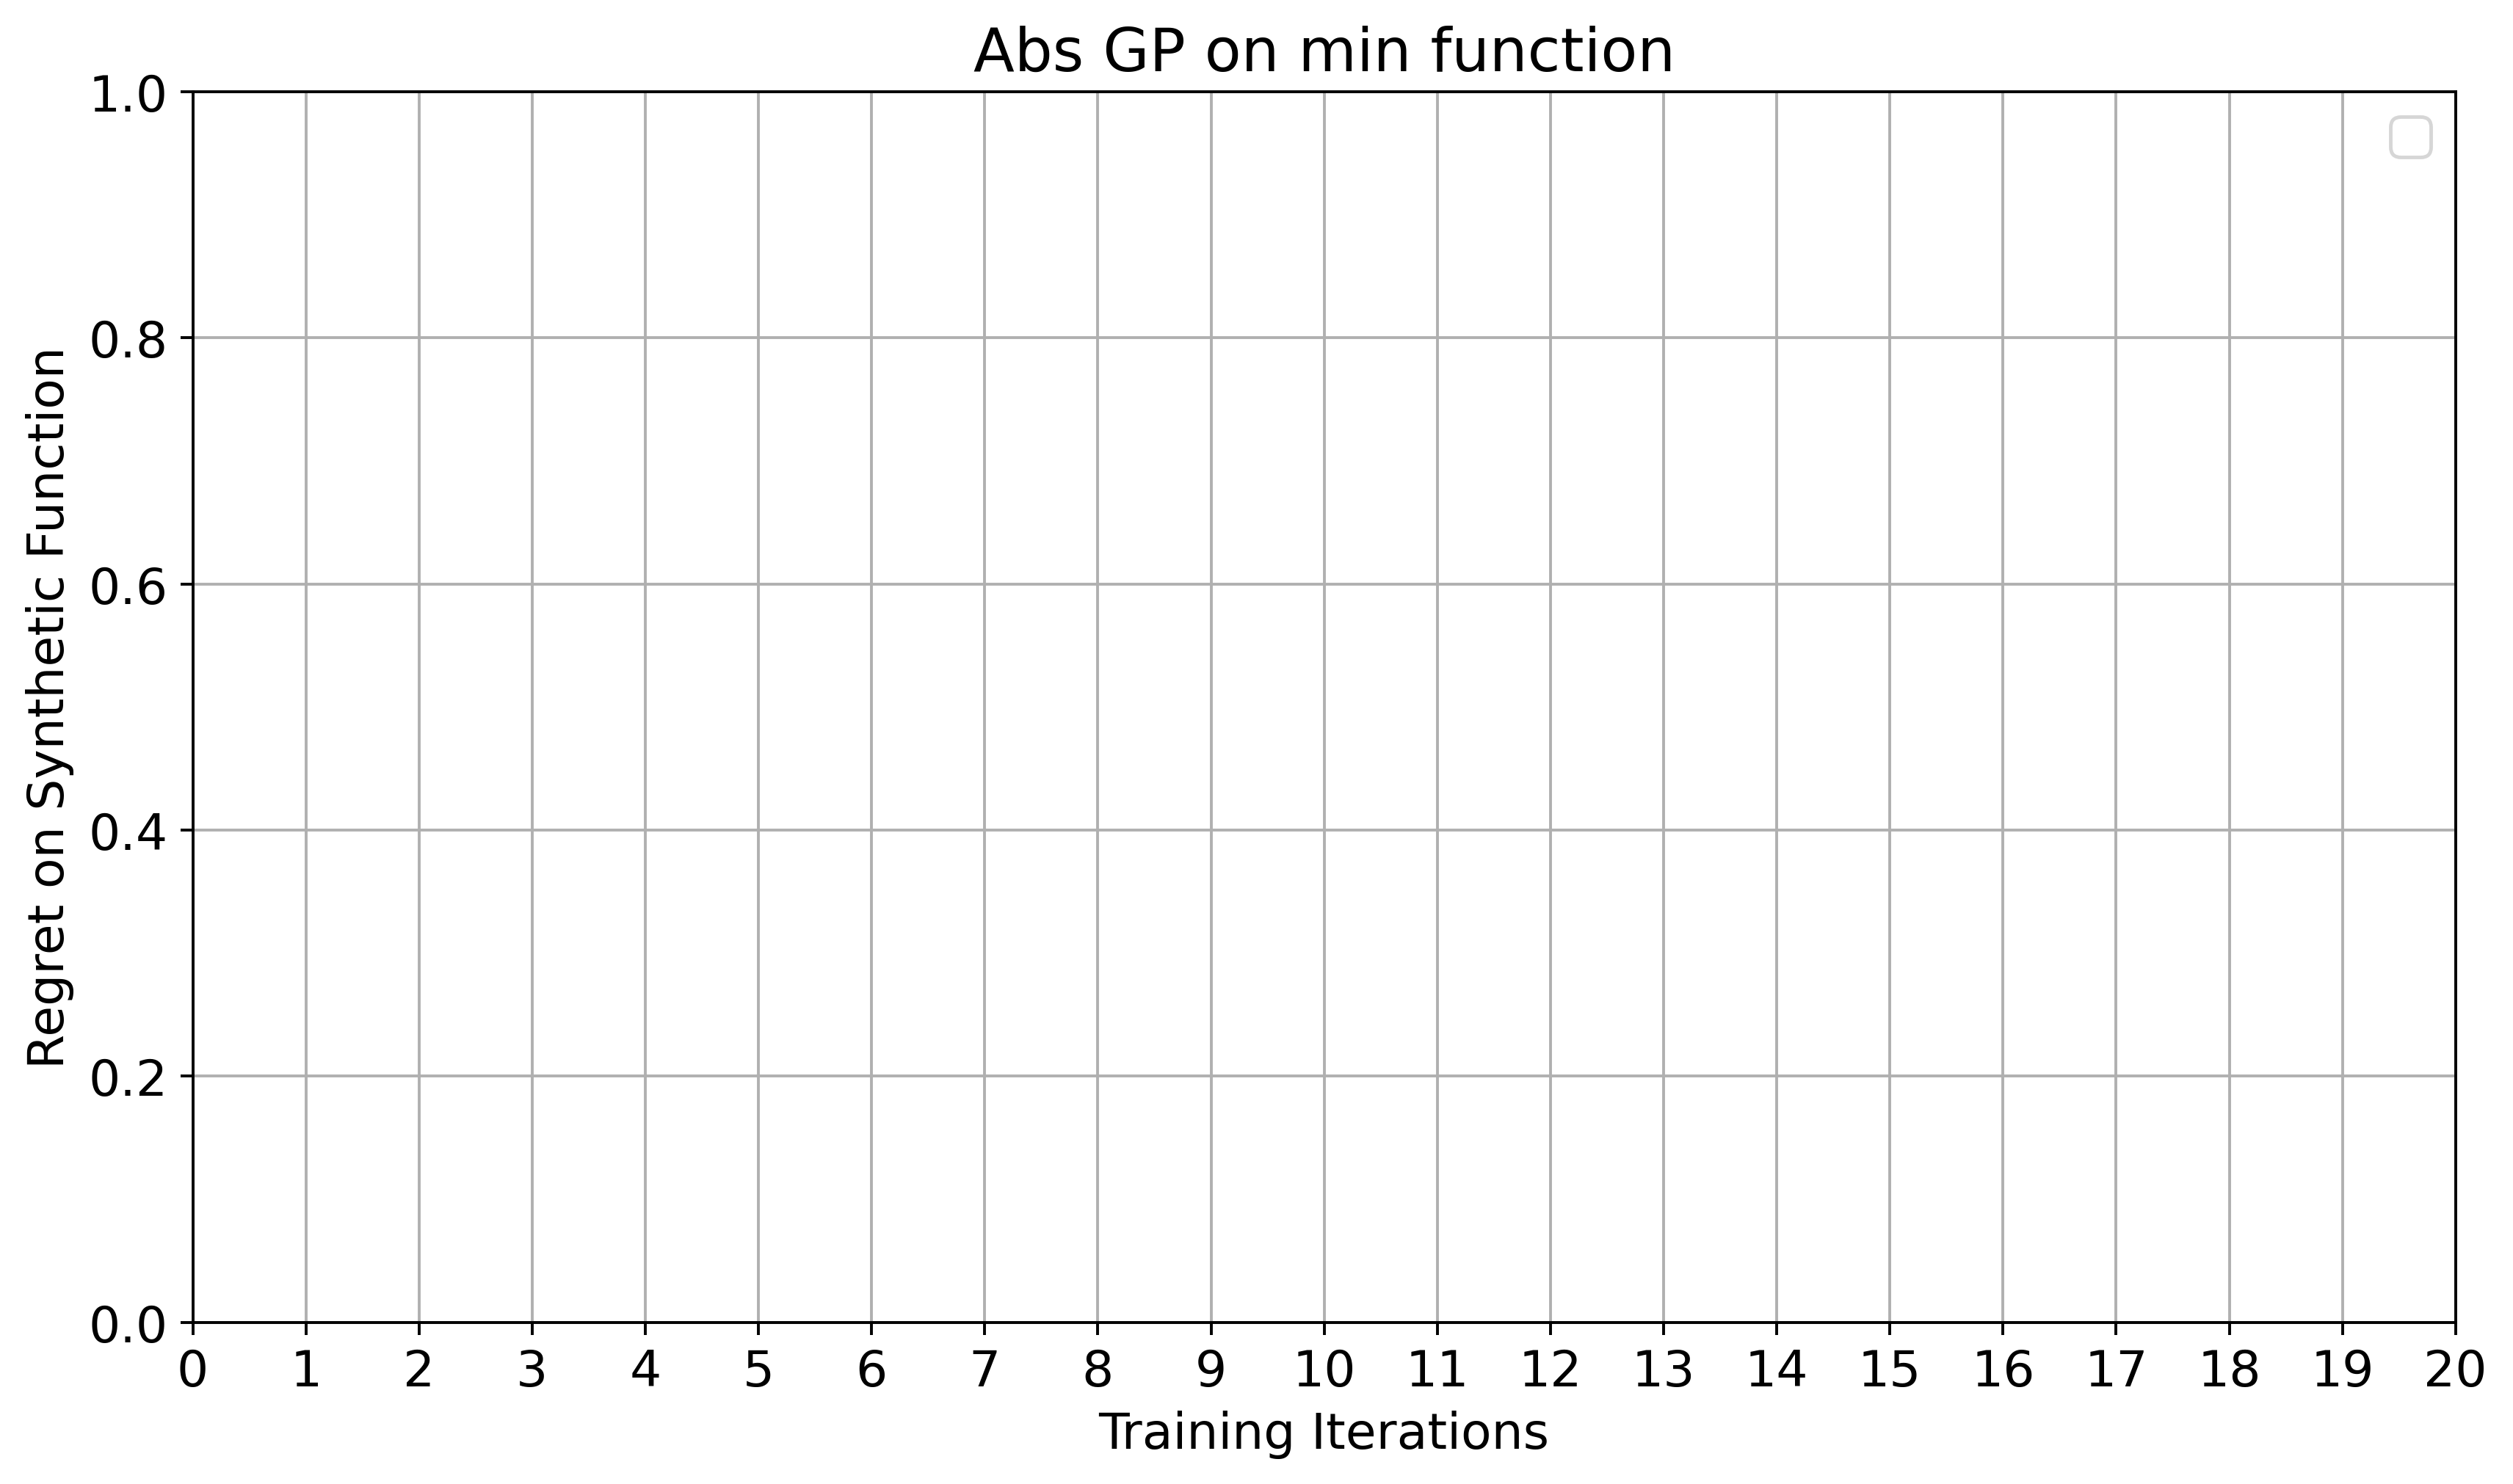

In [12]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']
#selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

before_time = '2024-09-07_00-00-00'
after_time = '2024-08-01_00-00-00'

pareto='False'

models = ['gp']
user = 'perfect'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
#selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']

colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00', '#00ff00', '#0000FF']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(10,6), dpi=350)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_pareto_'+pareto+'_'+hyper+'_env*/train_data.npz'
                print('\t'+glob_check)
                files = glob(glob_check)
                files = filter_by_time(files, before=before_time, after=after_time)
                
                if len(files) > 0:
                #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                #     files = glob(glob_check)


                    score_diffs = np.empty((0,21))
                    for file in files:
                        data_file = np.load(file)
                        print(file)
                        #print(list(data_file.keys()))
                        score_diff = np.mean(data_file['score_diff'], axis=(2,))
                        #score_diff = data_file['avg_correct']
                        score_diffs = np.append(score_diffs, score_diff, axis=0)

                    print(score_diffs.shape)
                    all_score_diffs.append(score_diffs)

                    itr_to_show = 21

                    mean_diffs = np.mean(score_diffs, axis=0)
                    std_diffs = np.std(score_diffs, axis=0)
                    print('standard diffs shape: '+ str(score_diffs.shape))
                    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                    print(mean_diffs.shape)

                    x = np.arange(1,itr_to_show)

                    sigma_to_plot = 1.0
                    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                    plt.gca().fill_between(x, \
                                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            color=colors[j], \
                                            alpha=0.1, \
                                            label='_nolegend_')
                    plt.plot(x, mean_diffs[1:itr_to_show], color=colors_dict[selector], linestyle=linestyles[0])

                    selector_text = ''
                    if selector == 'SGV_UCB':
                        selector_text = 'SGV-UCB'
                    elif selector == 'UCB':
                        selector_text = 'UCB'
                    elif selector == 'MUTUAL_INFO':
                        selector_text = 'Mutual Information'
                    elif selector == 'RANDOM':
                        selector_text = 'Random'
                    elif selector == 'BAYES_INFO_GAIN_PROBIT':
                        selector_text = 'Reward Optimization'
                    elif selector == 'ACQ_RHO':
                        selector_text = 'Acquisition-rho'
                    elif selector == 'ACQ_LL':
                        selector_text = 'Acquisition loglikelihood'
                    elif selector == 'ACQ_EPIC':
                        selector_text = 'Acquisition EPICish'
                    elif selector == 'ACQ_SP':
                        selector_text = 'Acquisition Spearman old'
                    elif selector == 'ACQ_SPEAR':
                        selector_text = 'Acquisition Spearman'
                    leg = selector_text + ' Query Selection'
                    leg_txt.append(leg)

                    color_idx += 1
                    line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Abs GP on min function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training_abs.png')

plt.show()

	results/AT_SGV_UCB_model_gp_choose1_user_human_choice_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_UCB_model_gp_choose1_user_human_choice_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_MUTUAL_INFO_model_gp_choose1_user_human_choice_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_RANDOM_model_gp_choose1_user_human_choice_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_BAYES_INFO_GAIN_PROBIT_model_gp_choose1_user_human_choice_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_BAYES_INFO_GAIN_999_model_gp_choose1_user_human_choice_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_ACQ_RHO_model_gp_choose1_user_human_choice_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_ACQ_LL_model_gp_choose1_user_human_choice_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_ACQ_EPIC_model_gp_choose1_user_human_choice_fake_min_pareto_False_no_env*/train_data.npz
	results/AT_ACQ_SP_model_gp_choose1_user_human_choice_fake_min_pareto_Fals

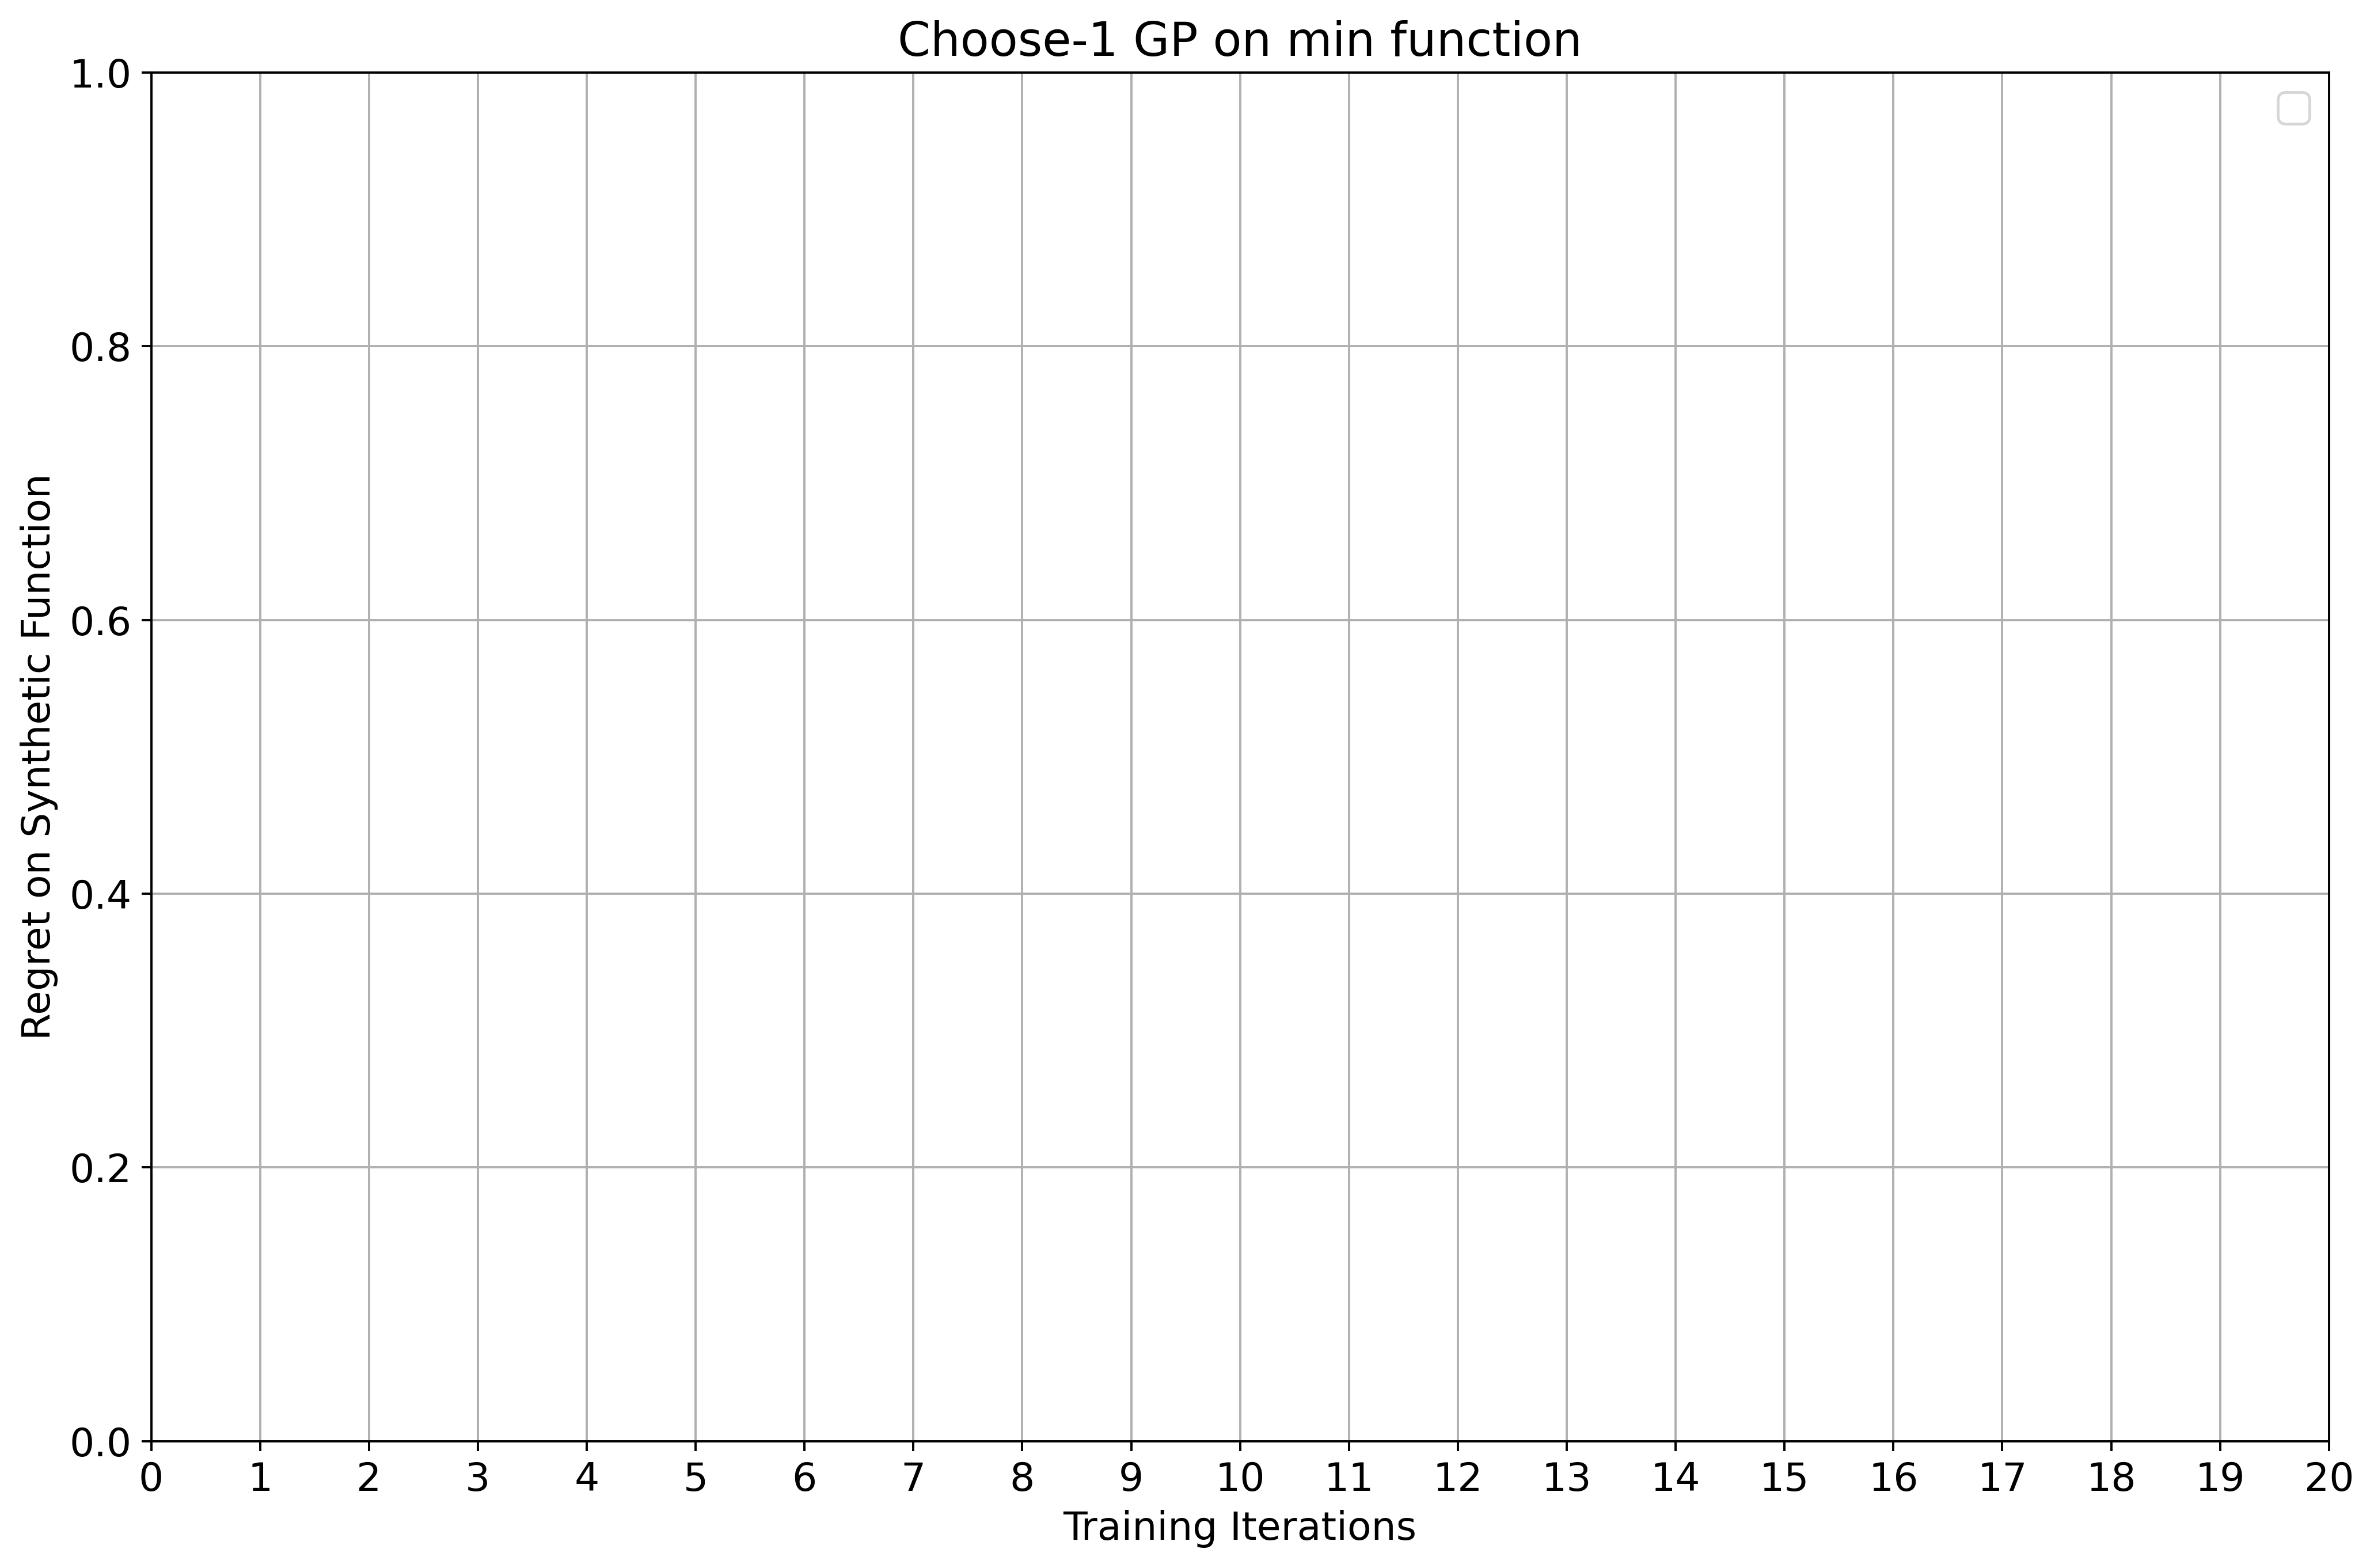

In [13]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']
#selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

before_time = '2025-09-07_00-00-00'
after_time = '2024-08-01_00-00-00'

pareto='False'

models = ['gp']
user = 'human_choice'
select = 'choose1'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
#selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']

colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00', '#00ff00', '#0000FF']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(12,8), dpi=350)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                glob_check = directory+'AT_'+selector+'_model_'+model+'_'+select+'_user_'+user+'_fake_'+fake_func+'_pareto_'+pareto+'_'+hyper+'_env*/train_data.npz'
                print('\t'+glob_check)
                files = glob(glob_check)
                files = filter_by_time(files, before=before_time, after=after_time)
                
                if len(files) > 0:
                #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                #     files = glob(glob_check)


                    score_diffs = np.empty((0,21))
                    for file in files:
                        data_file = np.load(file)
                        print(file)
                        #print(list(data_file.keys()))
                        score_diff = np.mean(data_file['score_diff'], axis=(2,))
                        #score_diff = data_file['avg_correct']
                        score_diffs = np.append(score_diffs, score_diff, axis=0)

                    print(score_diffs.shape)
                    all_score_diffs.append(score_diffs)

                    itr_to_show = 21

                    mean_diffs = np.mean(score_diffs, axis=0)
                    std_diffs = np.std(score_diffs, axis=0)
                    print('standard diffs shape: '+ str(score_diffs.shape))
                    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                    print(mean_diffs.shape)

                    x = np.arange(1,itr_to_show)

                    sigma_to_plot = 1.0
                    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                    plt.gca().fill_between(x, \
                                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            color=colors[j], \
                                            alpha=0.1, \
                                            label='_nolegend_')
                    plt.plot(x, mean_diffs[1:itr_to_show], color=colors_dict[selector], linestyle=linestyles[0])

                    selector_text = ''
                    if selector == 'SGV_UCB':
                        selector_text = 'SGV-UCB'
                    elif selector == 'UCB':
                        selector_text = 'UCB'
                    elif selector == 'MUTUAL_INFO':
                        selector_text = 'Mutual Information'
                    elif selector == 'RANDOM':
                        selector_text = 'Random'
                    elif selector == 'BAYES_INFO_GAIN_PROBIT':
                        selector_text = 'Reward Optimization'
                    elif selector == 'ACQ_RHO':
                        selector_text = 'Acquisition-rho'
                    elif selector == 'ACQ_LL':
                        selector_text = 'Acquisition loglikelihood'
                    elif selector == 'ACQ_EPIC':
                        selector_text = 'Acquisition EPICish'
                    elif selector == 'ACQ_SP':
                        selector_text = 'Acquisition Spearman old'
                    elif selector == 'ACQ_SPEAR':
                        selector_text = 'Acquisition Spearman'
                    leg = selector_text + ' Query Selection'
                    leg_txt.append(leg)

                    color_idx += 1
                    line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Choose-1 GP on min function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training_abs.png')

plt.show()

	results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_10.0_sigabs_0.5_sigpair_1.0_env*/train_data.npz
	results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_80.0_sigabs_0.5_sigpair_1.0_env*/train_data.npz
	results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_160.0_sigabs_0.5_sigpair_1.0_env*/train_data.npz
[]


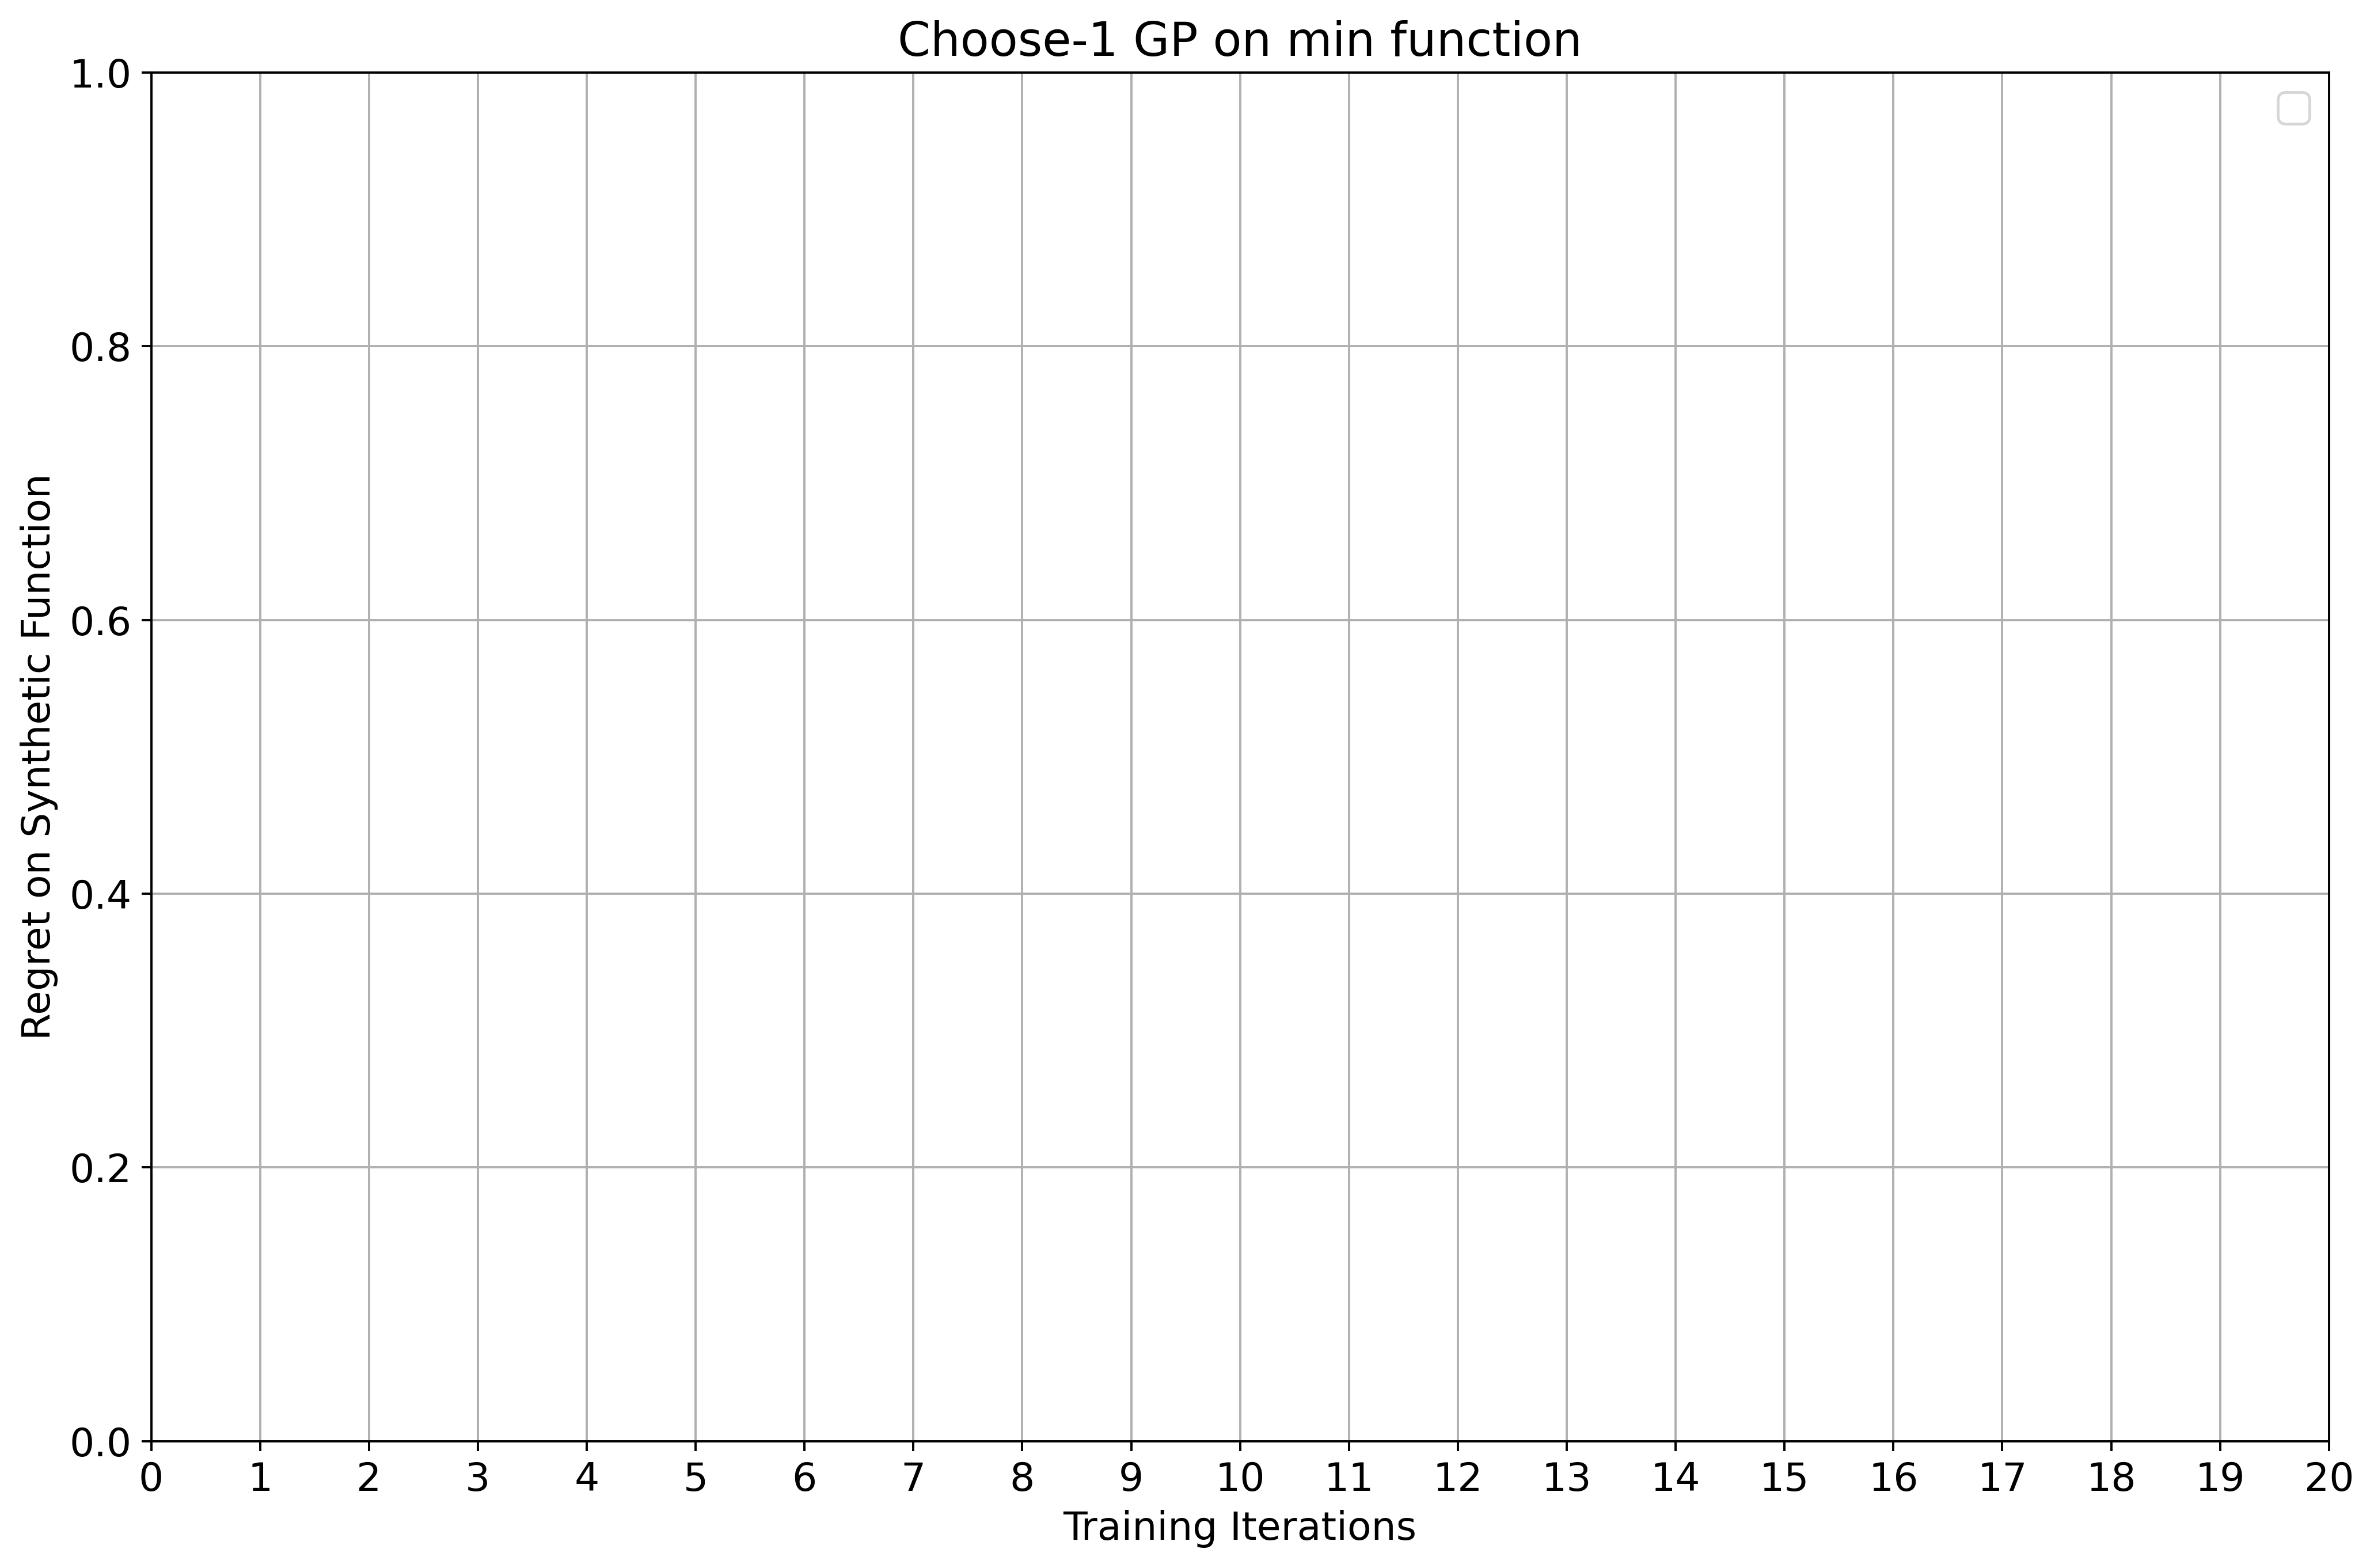

In [14]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'UCB', 'SW_ACQ_RHO', 'SW_ACQ_LL', 'SW_ACQ_EPIC', 'SW_ACQ_SPEAR']
selectors = ['SW_ACQ_RHO']
#selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

before_time = '2025-08-07_00-00-00'
after_time = '2024-08-01_00-00-00'

pareto='False'

models = ['gp']
user = 'human_choice'
select = 'switch'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
#selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']

colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00', '#00ff00', '#0000FF']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(12,8), dpi=350)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

vs=['10.0', '80.0', '160.0']
sigpairs=['1.0']
sigabss=['0.5']

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                for m, v in enumerate(vs):
                    for n, sigpair in enumerate(sigpairs):
                        for o, sigabs in enumerate(sigabss):
                            glob_check = directory+'AT_'+selector+'_model_'+model+'_'+select+'_user_'+user+'_fake_'+fake_func+'_pareto_'+pareto+'_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair+'_env*/train_data.npz'
                            print('\t'+glob_check)
                            files = glob(glob_check)
                            files = filter_by_time(files, before=before_time, after=after_time)

                            if len(files) > 0:
                            #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                            #     files = glob(glob_check)


                                score_diffs = np.empty((0,21))
                                for file in files:
                                    data_file = np.load(file)
                                    print(file)
                                    #print(list(data_file.keys()))
                                    score_diff = np.mean(data_file['score_diff'], axis=(2,))
                                    #score_diff = data_file['avg_correct']
                                    score_diffs = np.append(score_diffs, score_diff, axis=0)

                                print(score_diffs.shape)
                                all_score_diffs.append(score_diffs)

                                itr_to_show = 21

                                mean_diffs = np.mean(score_diffs, axis=0)
                                std_diffs = np.std(score_diffs, axis=0)
                                print('standard diffs shape: '+ str(score_diffs.shape))
                                std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                                print(mean_diffs.shape)

                                x = np.arange(1,itr_to_show)

                                sigma_to_plot = 1.0
                                #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                                plt.gca().fill_between(x, \
                                                        mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                        mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                        color=colors[j], \
                                                        alpha=0.1, \
                                                        label='_nolegend_')
                                plt.plot(x, mean_diffs[1:itr_to_show], color=colors[color_idx], linestyle=linestyles[0])

                                selector_text = ''
                                if selector == 'SGV_UCB':
                                    selector_text = 'SGV-UCB'
                                elif selector == 'UCB':
                                    selector_text = 'UCB'
                                elif selector == 'MUTUAL_INFO':
                                    selector_text = 'Mutual Information'
                                elif selector == 'RANDOM':
                                    selector_text = 'Random'
                                elif selector == 'BAYES_INFO_GAIN_PROBIT':
                                    selector_text = 'Reward Optimization'
                                elif selector == 'ACQ_RHO' or selector == 'SW_ACQ_RHO':
                                    selector_text = 'Acquisition-rho'
                                elif selector == 'ACQ_LL' or selector == 'SW_ACQ_LL':
                                    selector_text = 'Acquisition loglikelihood'
                                elif selector == 'ACQ_EPIC' or selector == 'SW_ACQ_EPIC':
                                    selector_text = 'Acquisition EPICish'
                                elif selector == 'ACQ_SP':
                                    selector_text = 'Acquisition Spearman old'
                                elif selector == 'ACQ_SPEAR' or selector == 'SW_ACQ_SPEAR':
                                    selector_text = 'Acquisition Spearman'
                                #leg = selector_text + ' Query Selection'
                                leg = 'v: ' + v
                                leg_txt.append(leg)

                                color_idx += 1
                                line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Choose-1 GP on min function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training_abs.png')

plt.show()

	results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_0.1_env*/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_0.1_env9_2024-08-22_16-50-52/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_0.1_env1_2024-08-22_16-50-51/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_0.1_env3_2024-08-22_16-50-52/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_0.1_env4_2024-08-22_16-50-51/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_0.1_env7_2024-08-22_16-50-51/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_0.1_en

results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env1_2024-08-27_02-40-53/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env9_2024-08-26_22-27-00/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env4_2024-08-27_00-39-28/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env3_2024-08-27_08-25-09/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env4_2024-08-27_11-21-18/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env0_2024-08-27_05-12-03/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs

results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env9_2024-08-27_02-40-53/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env3_2024-08-27_07-32-25/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env3_2024-08-27_04-15-59/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env5_2024-08-27_08-25-08/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env8_2024-08-27_12-16-39/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env7_2024-08-27_02-40-54/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs

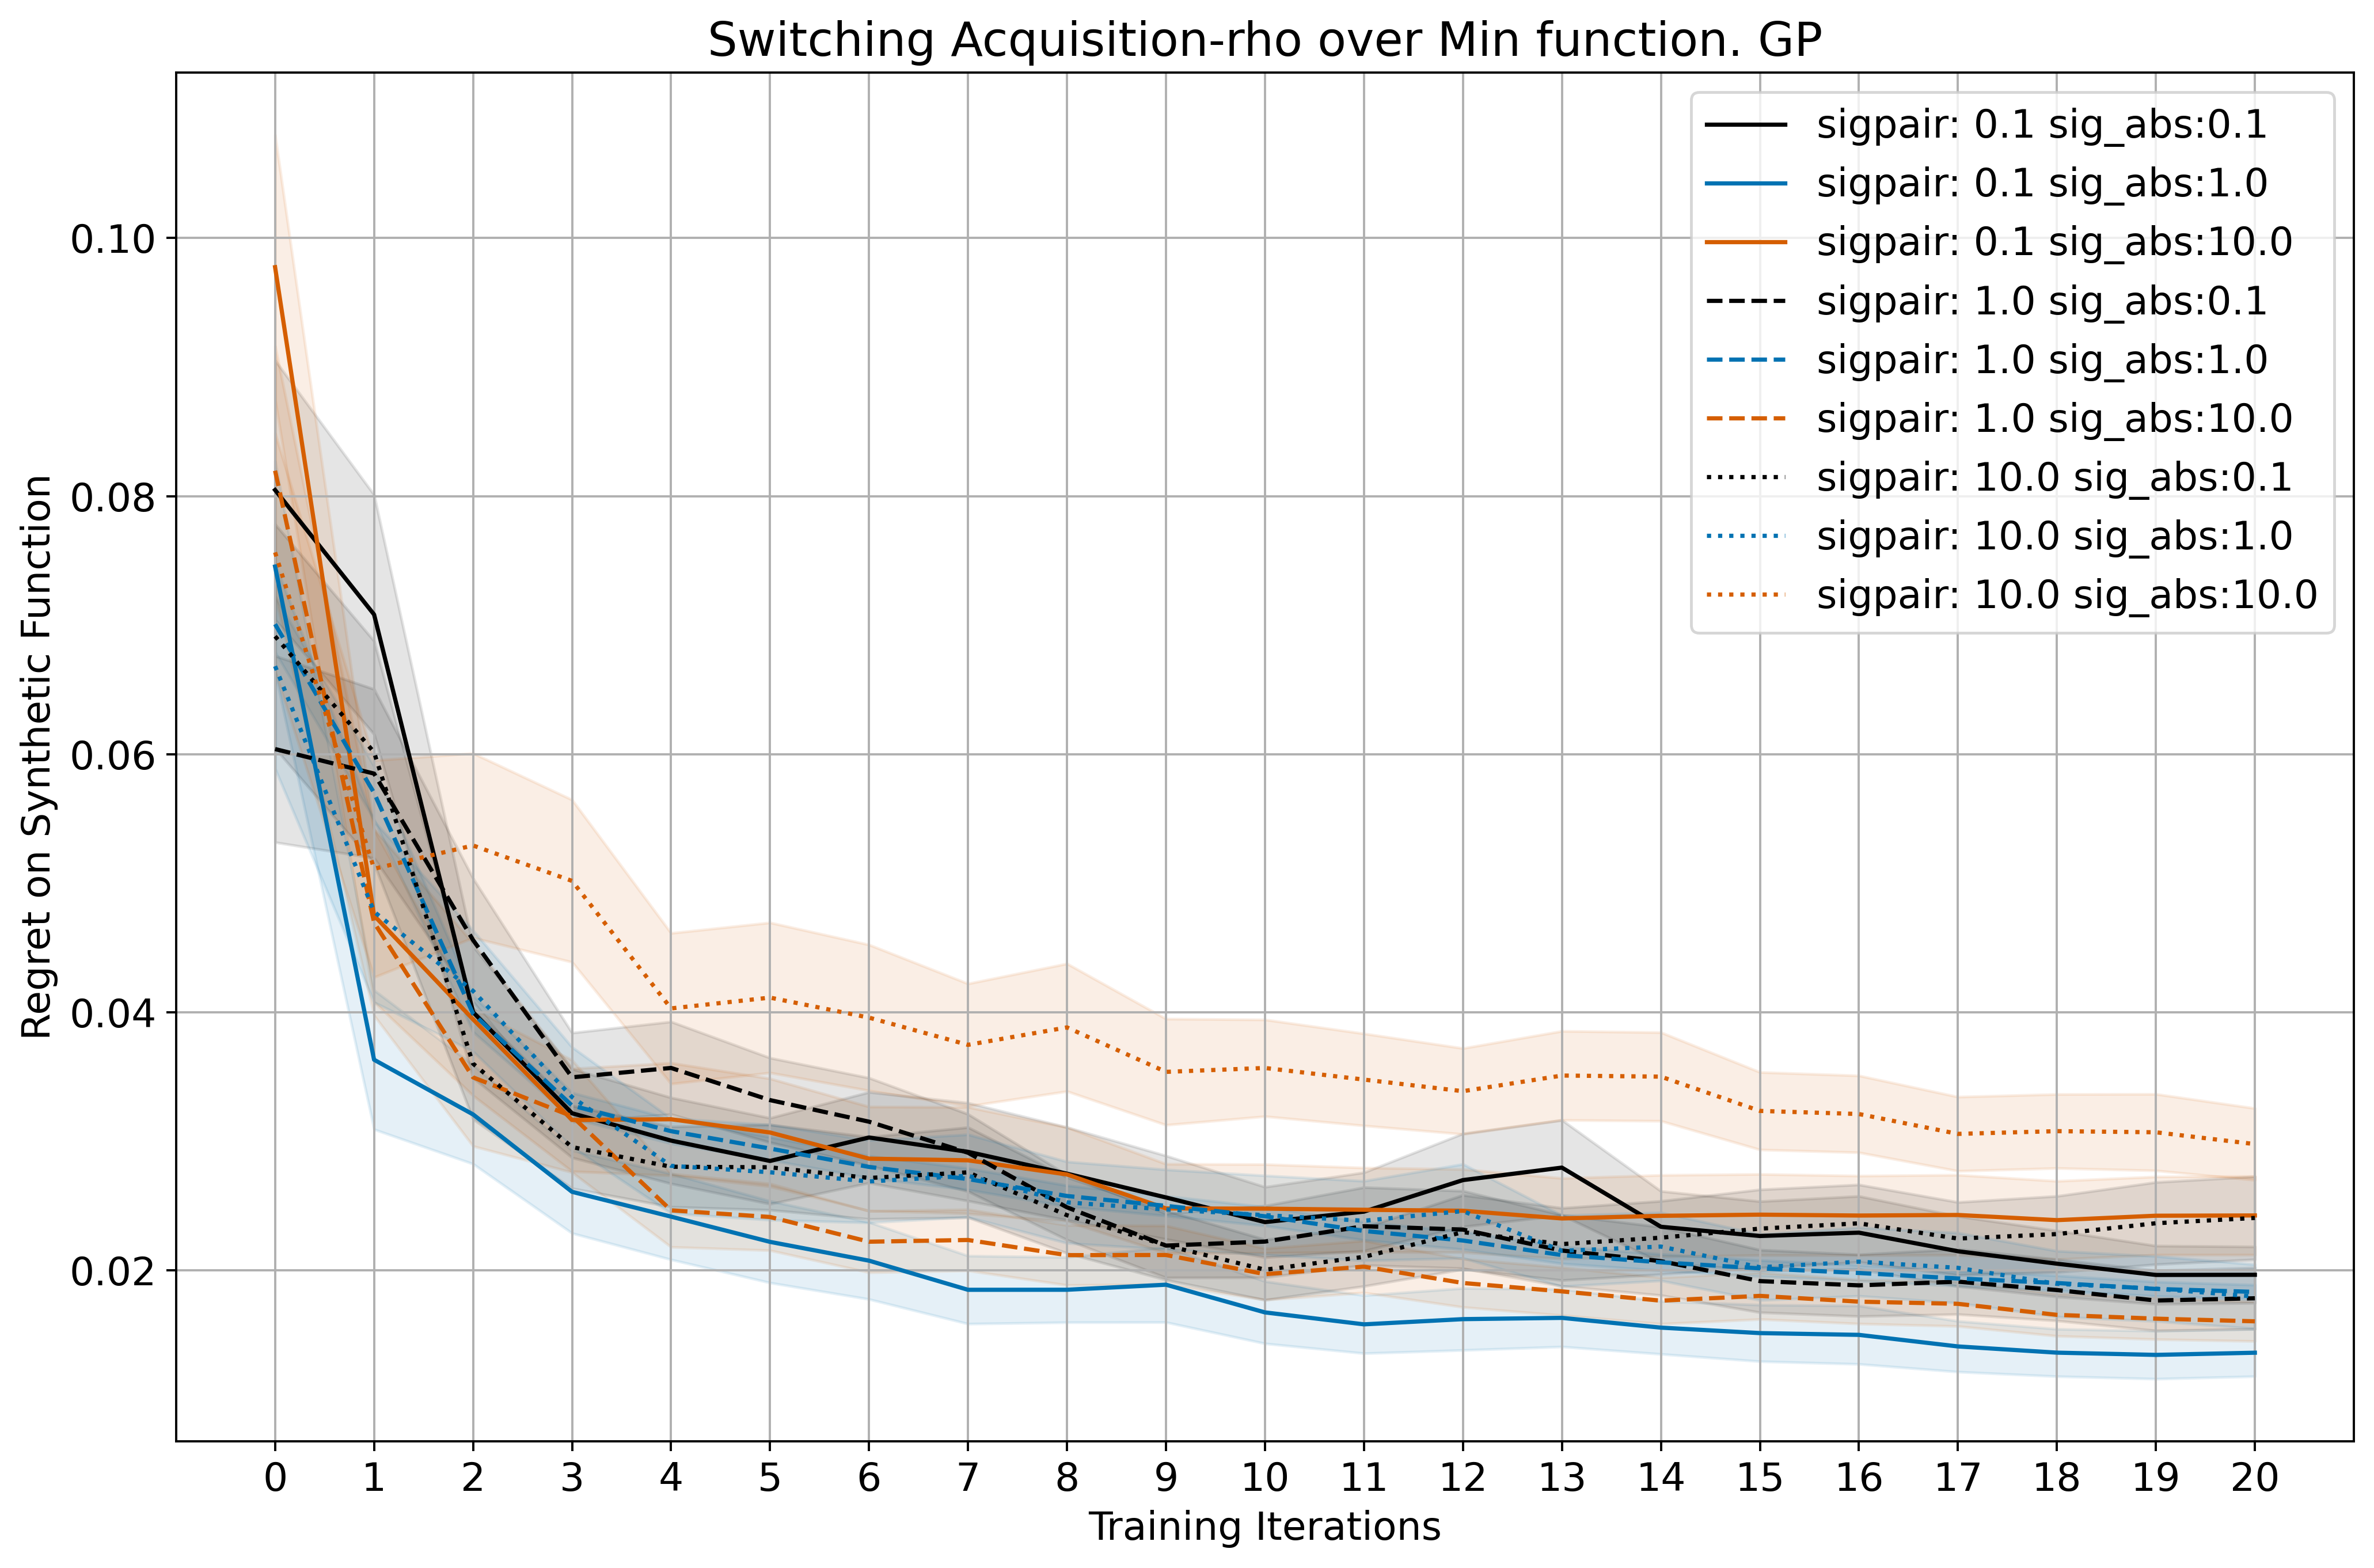

In [15]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'UCB', 'SW_ACQ_RHO', 'SW_ACQ_LL', 'SW_ACQ_EPIC', 'SW_ACQ_SPEAR']
selectors = ['SW_ACQ_RHO']
#selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

before_time = '2024-08-28_00-00-00'
after_time = '2024-08-01_00-00-00'

pareto='False'

models = ['gp']
user = 'human_choice'
select = 'switch'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
#selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']

colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00', '#00ff00', '#0000FF']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(12,8), dpi=350)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

vs=['60.0']
#vs=['160.0']
sigpairs=['0.1', '1.0', '10.0']
sigabss=['0.1', '1.0','10.0']

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                for m, v in enumerate(vs):
                    for n, sigpair in enumerate(sigpairs):
                        for o, sigabs in enumerate(sigabss):
                            glob_check = directory+'AT_'+selector+'_model_'+model+'_'+select+'_user_'+user+'_fake_'+fake_func+'_pareto_'+pareto+'_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair+'_env*/train_data.npz'
                            print('\t'+glob_check)
                            files = glob(glob_check)
                            files = filter_by_time(files, before=before_time, after=after_time)

                            if len(files) > 0:
                            #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                            #     files = glob(glob_check)


                                score_diffs = np.empty((0,21))
                                for file in files:
                                    data_file = np.load(file)
                                    print(file)
                                    #print(list(data_file.keys()))
                                    score_diff = np.mean(data_file['score_diff'], axis=(2,))
                                    #score_diff = data_file['avg_correct']
                                    score_diffs = np.append(score_diffs, score_diff, axis=0)

                                print(score_diffs.shape)
                                all_score_diffs.append(score_diffs)

                                itr_to_show = 21

                                mean_diffs = np.mean(score_diffs, axis=0)
                                std_diffs = np.std(score_diffs, axis=0)
                                print('standard diffs shape: '+ str(score_diffs.shape))
                                std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                                print(mean_diffs.shape)

                                x = np.arange(0,itr_to_show)

                                sigma_to_plot = 1.0
                                #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                                plt.gca().fill_between(x, \
                                                        mean_diffs[0:itr_to_show]-(sigma_to_plot*std_error_mean[0:itr_to_show]), \
                                                        mean_diffs[0:itr_to_show]+(sigma_to_plot*std_error_mean[0:itr_to_show]), \
                                                        color=sig_color_dict[sigabs], \
                                                        alpha=0.1, \
                                                        label='_nolegend_')
                                plt.plot(x, mean_diffs[0:itr_to_show], color=sig_color_dict[sigabs], linestyle=sig_style_dict[sigpair])

                                selector_text = ''
                                if selector == 'SGV_UCB':
                                    selector_text = 'SGV-UCB'
                                elif selector == 'UCB':
                                    selector_text = 'UCB'
                                elif selector == 'MUTUAL_INFO':
                                    selector_text = 'Mutual Information'
                                elif selector == 'RANDOM':
                                    selector_text = 'Random'
                                elif selector == 'BAYES_INFO_GAIN_PROBIT':
                                    selector_text = 'Reward Optimization'
                                elif selector == 'ACQ_RHO' or selector == 'SW_ACQ_RHO':
                                    selector_text = 'Acquisition-rho'
                                elif selector == 'ACQ_LL' or selector == 'SW_ACQ_LL':
                                    selector_text = 'Acquisition loglikelihood'
                                elif selector == 'ACQ_EPIC' or selector == 'SW_ACQ_EPIC':
                                    selector_text = 'Acquisition EPICish'
                                elif selector == 'ACQ_SP':
                                    selector_text = 'Acquisition Spearman old'
                                elif selector == 'ACQ_SPEAR' or selector == 'SW_ACQ_SPEAR':
                                    selector_text = 'Acquisition Spearman'
                                #leg = selector_text + ' Query Selection'
                                leg = 'sigpair: ' + sigpair + ' sig_abs:' + sigabs
                                leg_txt.append(leg)

                                color_idx += 1
                                line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Switching '+selector_text+' over Min function. GP')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training_abs.png')

plt.show()

	results/AT_SW_ACQ_LL_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_1.0_env*/train_data.npz
results/AT_SW_ACQ_LL_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_1.0_env1_2024-08-23_03-42-22/train_data.npz
results/AT_SW_ACQ_LL_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_1.0_env6_2024-08-23_03-42-22/train_data.npz
results/AT_SW_ACQ_LL_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_1.0_env2_2024-08-23_03-42-22/train_data.npz
results/AT_SW_ACQ_LL_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_1.0_env7_2024-08-23_03-42-22/train_data.npz
results/AT_SW_ACQ_LL_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_1.0_env5_2024-08-23_03-42-22/train_data.npz
results/AT_SW_ACQ_LL_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_0.1_sigpair_1.0_env8_2024

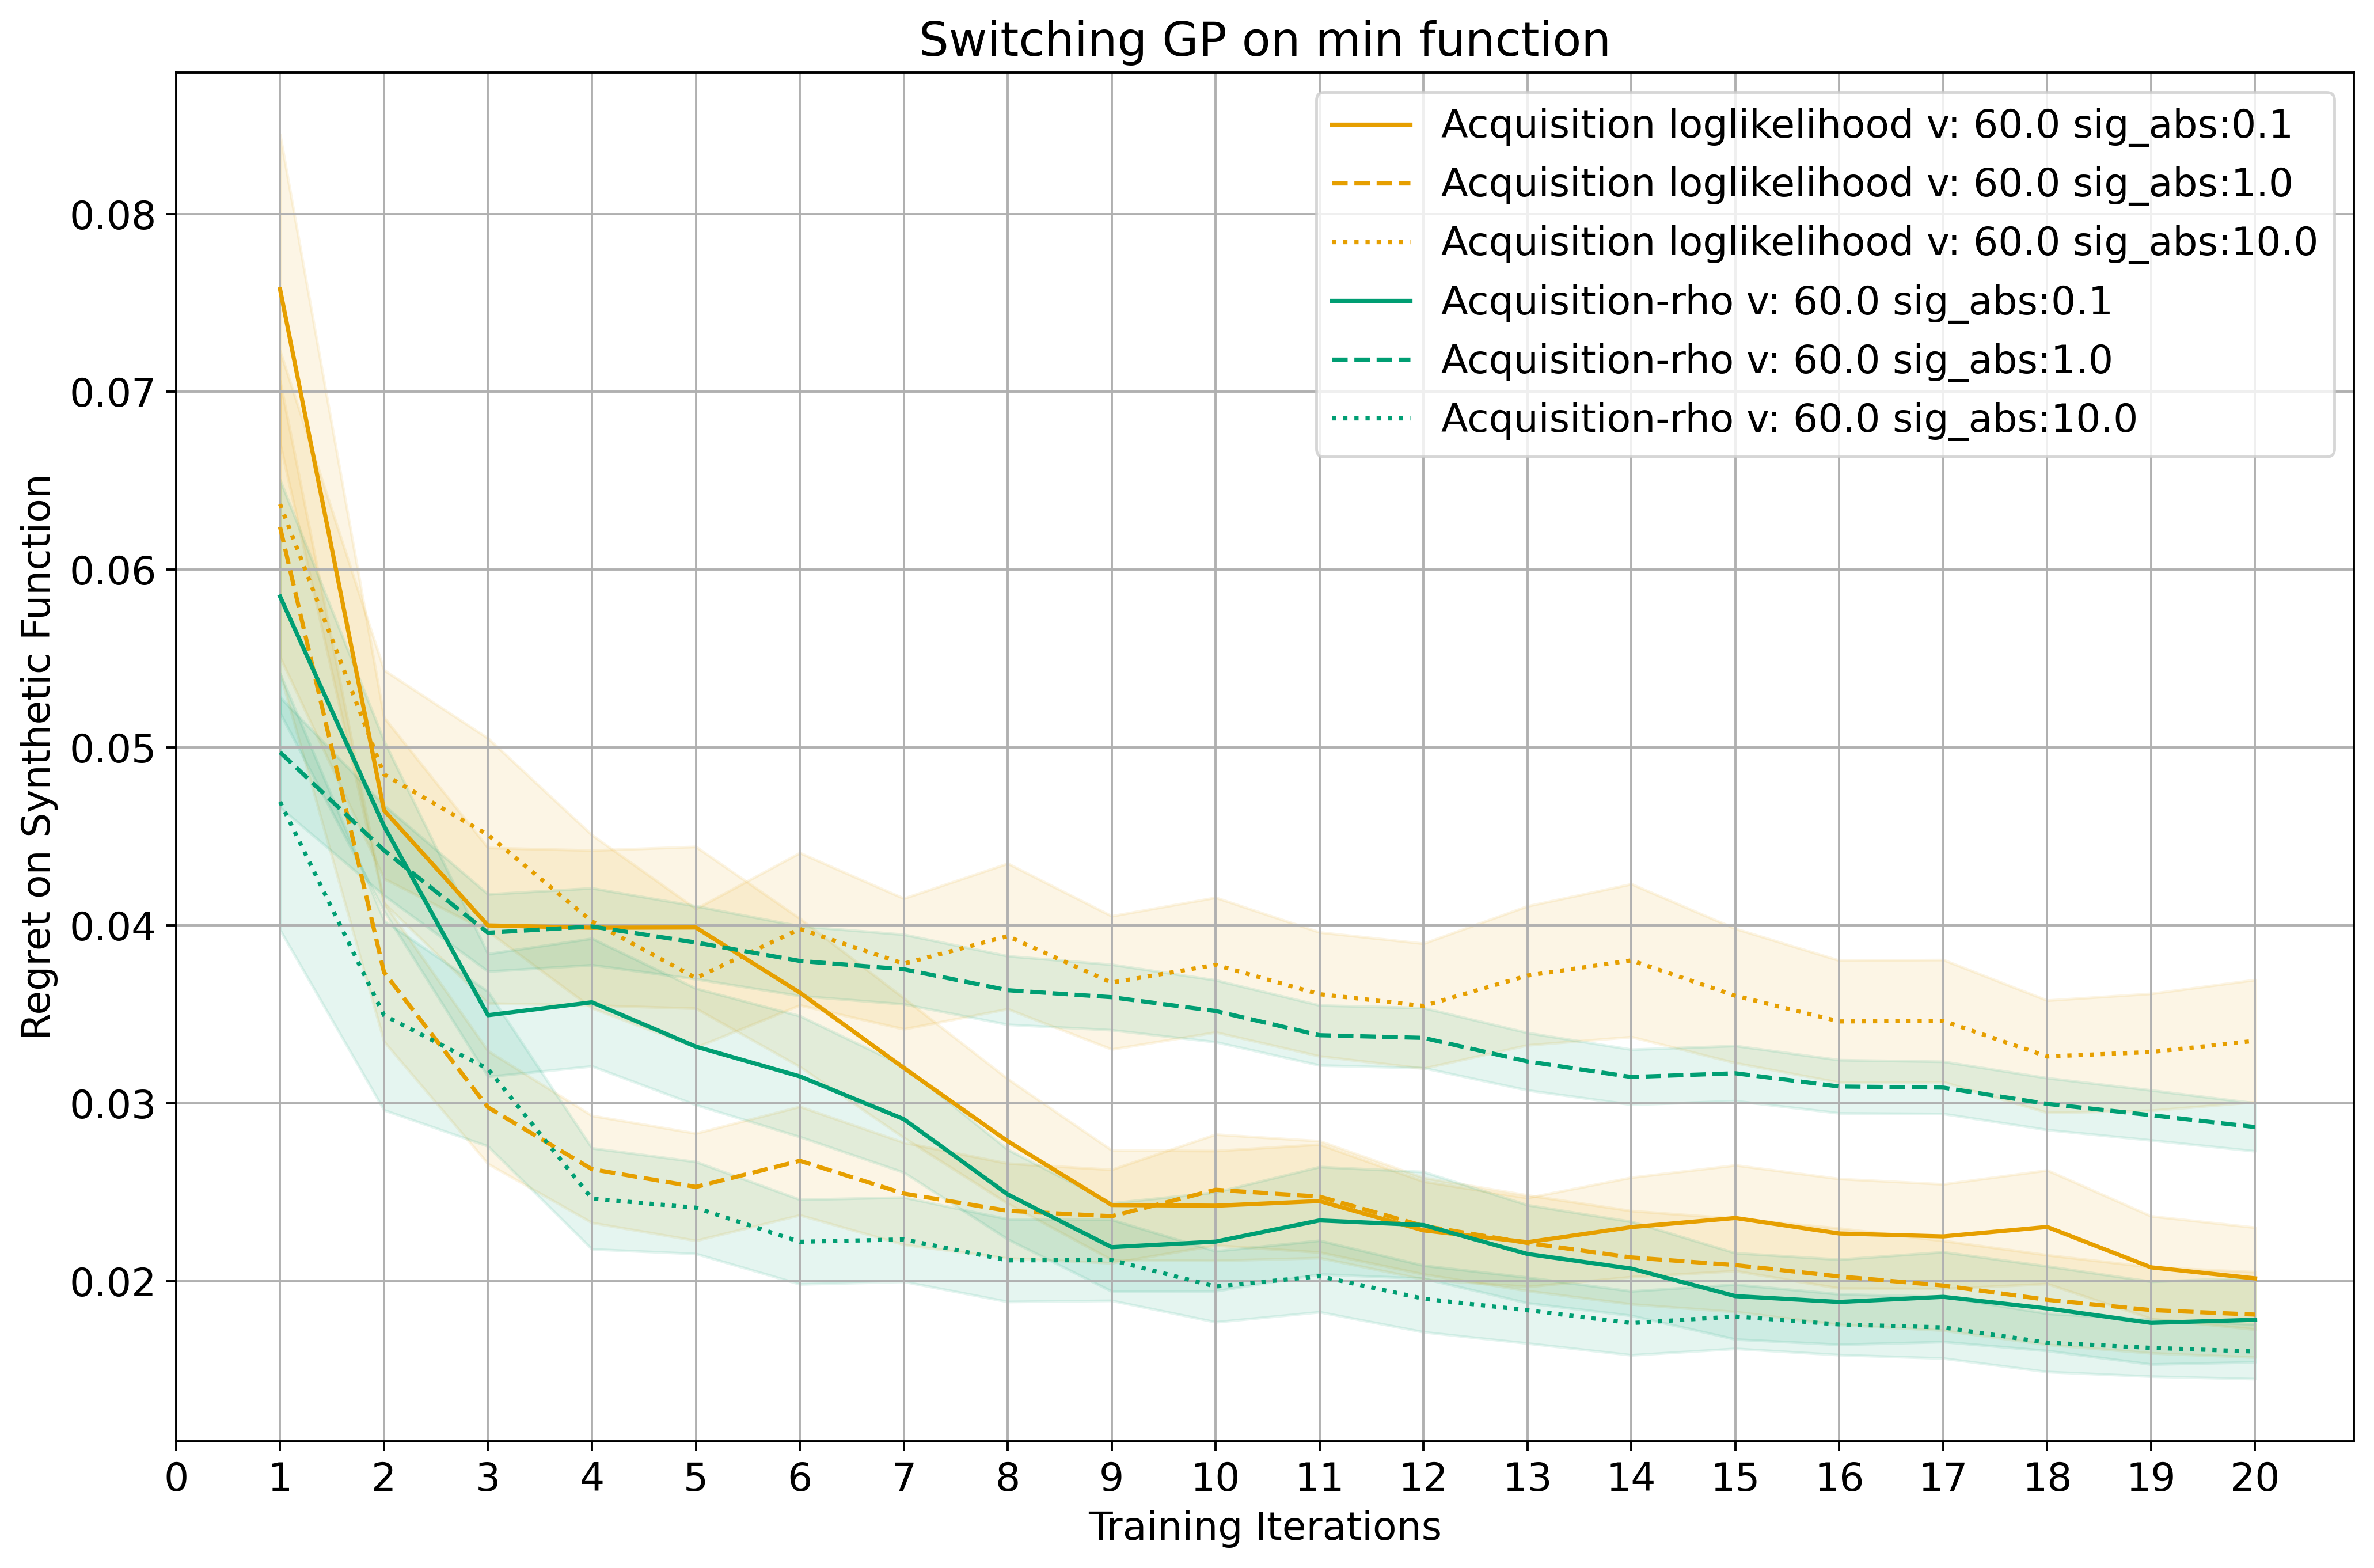

In [16]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'UCB', 'SW_ACQ_RHO', 'SW_ACQ_LL', 'SW_ACQ_EPIC', 'SW_ACQ_SPEAR']
selectors = ['SW_ACQ_LL', 'SW_ACQ_RHO']
#selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

before_time = '2024-08-27_00-00-00'
after_time = '2024-08-01_00-00-00'

pareto='False'

models = ['gp']
user = 'human_choice'
select = 'switch'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
#selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']

colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00', '#00ff00', '#0000FF']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(12,8), dpi=350)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

vs=['60.0']
#vs=['160.0']
sigpairs=['1.0']
#sigabss=['0.1','0.2', '0.5','1.0']
sigabss=['0.1', '1.0', '10.0']

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                for m, v in enumerate(vs):
                    for n, sigpair in enumerate(sigpairs):
                        for o, sigabs in enumerate(sigabss):
                            glob_check = directory+'AT_'+selector+'_model_'+model+'_'+select+'_user_'+user+'_fake_'+fake_func+'_pareto_'+pareto+'_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair+'_env*/train_data.npz'
                            print('\t'+glob_check)
                            files = glob(glob_check)
                            files = filter_by_time(files, before=before_time, after=after_time)

                            if len(files) > 0:
                            #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                            #     files = glob(glob_check)


                                score_diffs = np.empty((0,21))
                                for file in files:
                                    data_file = np.load(file)
                                    print(file)
                                    #print(list(data_file.keys()))
                                    score_diff = np.mean(data_file['score_diff'], axis=(2,))
                                    #score_diff = data_file['avg_correct']
                                    score_diffs = np.append(score_diffs, score_diff, axis=0)

                                print(score_diffs.shape)
                                all_score_diffs.append(score_diffs)

                                itr_to_show = 21

                                mean_diffs = np.mean(score_diffs, axis=0)
                                std_diffs = np.std(score_diffs, axis=0)
                                print('standard diffs shape: '+ str(score_diffs.shape))
                                std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                                print(mean_diffs.shape)

                                x = np.arange(1,itr_to_show)

                                sigma_to_plot = 1.0
                                #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                                plt.gca().fill_between(x, \
                                                        mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                        mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                        color=colors_dict[selector], \
                                                        alpha=0.1, \
                                                        label='_nolegend_')
                                plt.plot(x, mean_diffs[1:itr_to_show], color=colors_dict[selector], linestyle=sig_style_dict[sigabs])

                                selector_text = ''
                                if selector == 'SGV_UCB':
                                    selector_text = 'SGV-UCB'
                                elif selector == 'UCB':
                                    selector_text = 'UCB'
                                elif selector == 'MUTUAL_INFO':
                                    selector_text = 'Mutual Information'
                                elif selector == 'RANDOM':
                                    selector_text = 'Random'
                                elif selector == 'BAYES_INFO_GAIN_PROBIT':
                                    selector_text = 'Reward Optimization'
                                elif selector == 'ACQ_RHO' or selector == 'SW_ACQ_RHO':
                                    selector_text = 'Acquisition-rho'
                                elif selector == 'ACQ_LL' or selector == 'SW_ACQ_LL':
                                    selector_text = 'Acquisition loglikelihood'
                                elif selector == 'ACQ_EPIC' or selector == 'SW_ACQ_EPIC':
                                    selector_text = 'Acquisition EPICish'
                                elif selector == 'ACQ_SP':
                                    selector_text = 'Acquisition Spearman old'
                                elif selector == 'ACQ_SPEAR' or selector == 'SW_ACQ_SPEAR':
                                    selector_text = 'Acquisition Spearman'
                                #leg = selector_text + ' Query Selection'
                                leg = selector_text+' v: ' + v + ' sig_abs:' + sigabs
                                leg_txt.append(leg)

                                color_idx += 1
                                line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Switching GP on min function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training_abs.png')

plt.show()

	results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env2*/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env2_2024-09-01_21-44-41/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env2_2024-08-31_22-42-54/train_data.npz
(20, 21)
standard diffs shape: (20, 21)
(21,)
	results/AT_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env2*/train_data.npz
results/AT_ACQ_RHO_model_gp_switch_user_human_choice_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_env2_2024-09-02_20-18-23/train_data.npz
(10, 21)
standard diffs shape: (10, 21)
(21,)
['Switching acquisition-rho v: 60.0 sig_abs:1.0', 'pairwise Acquisition-rho v: 60.0 sig_abs:1.0']


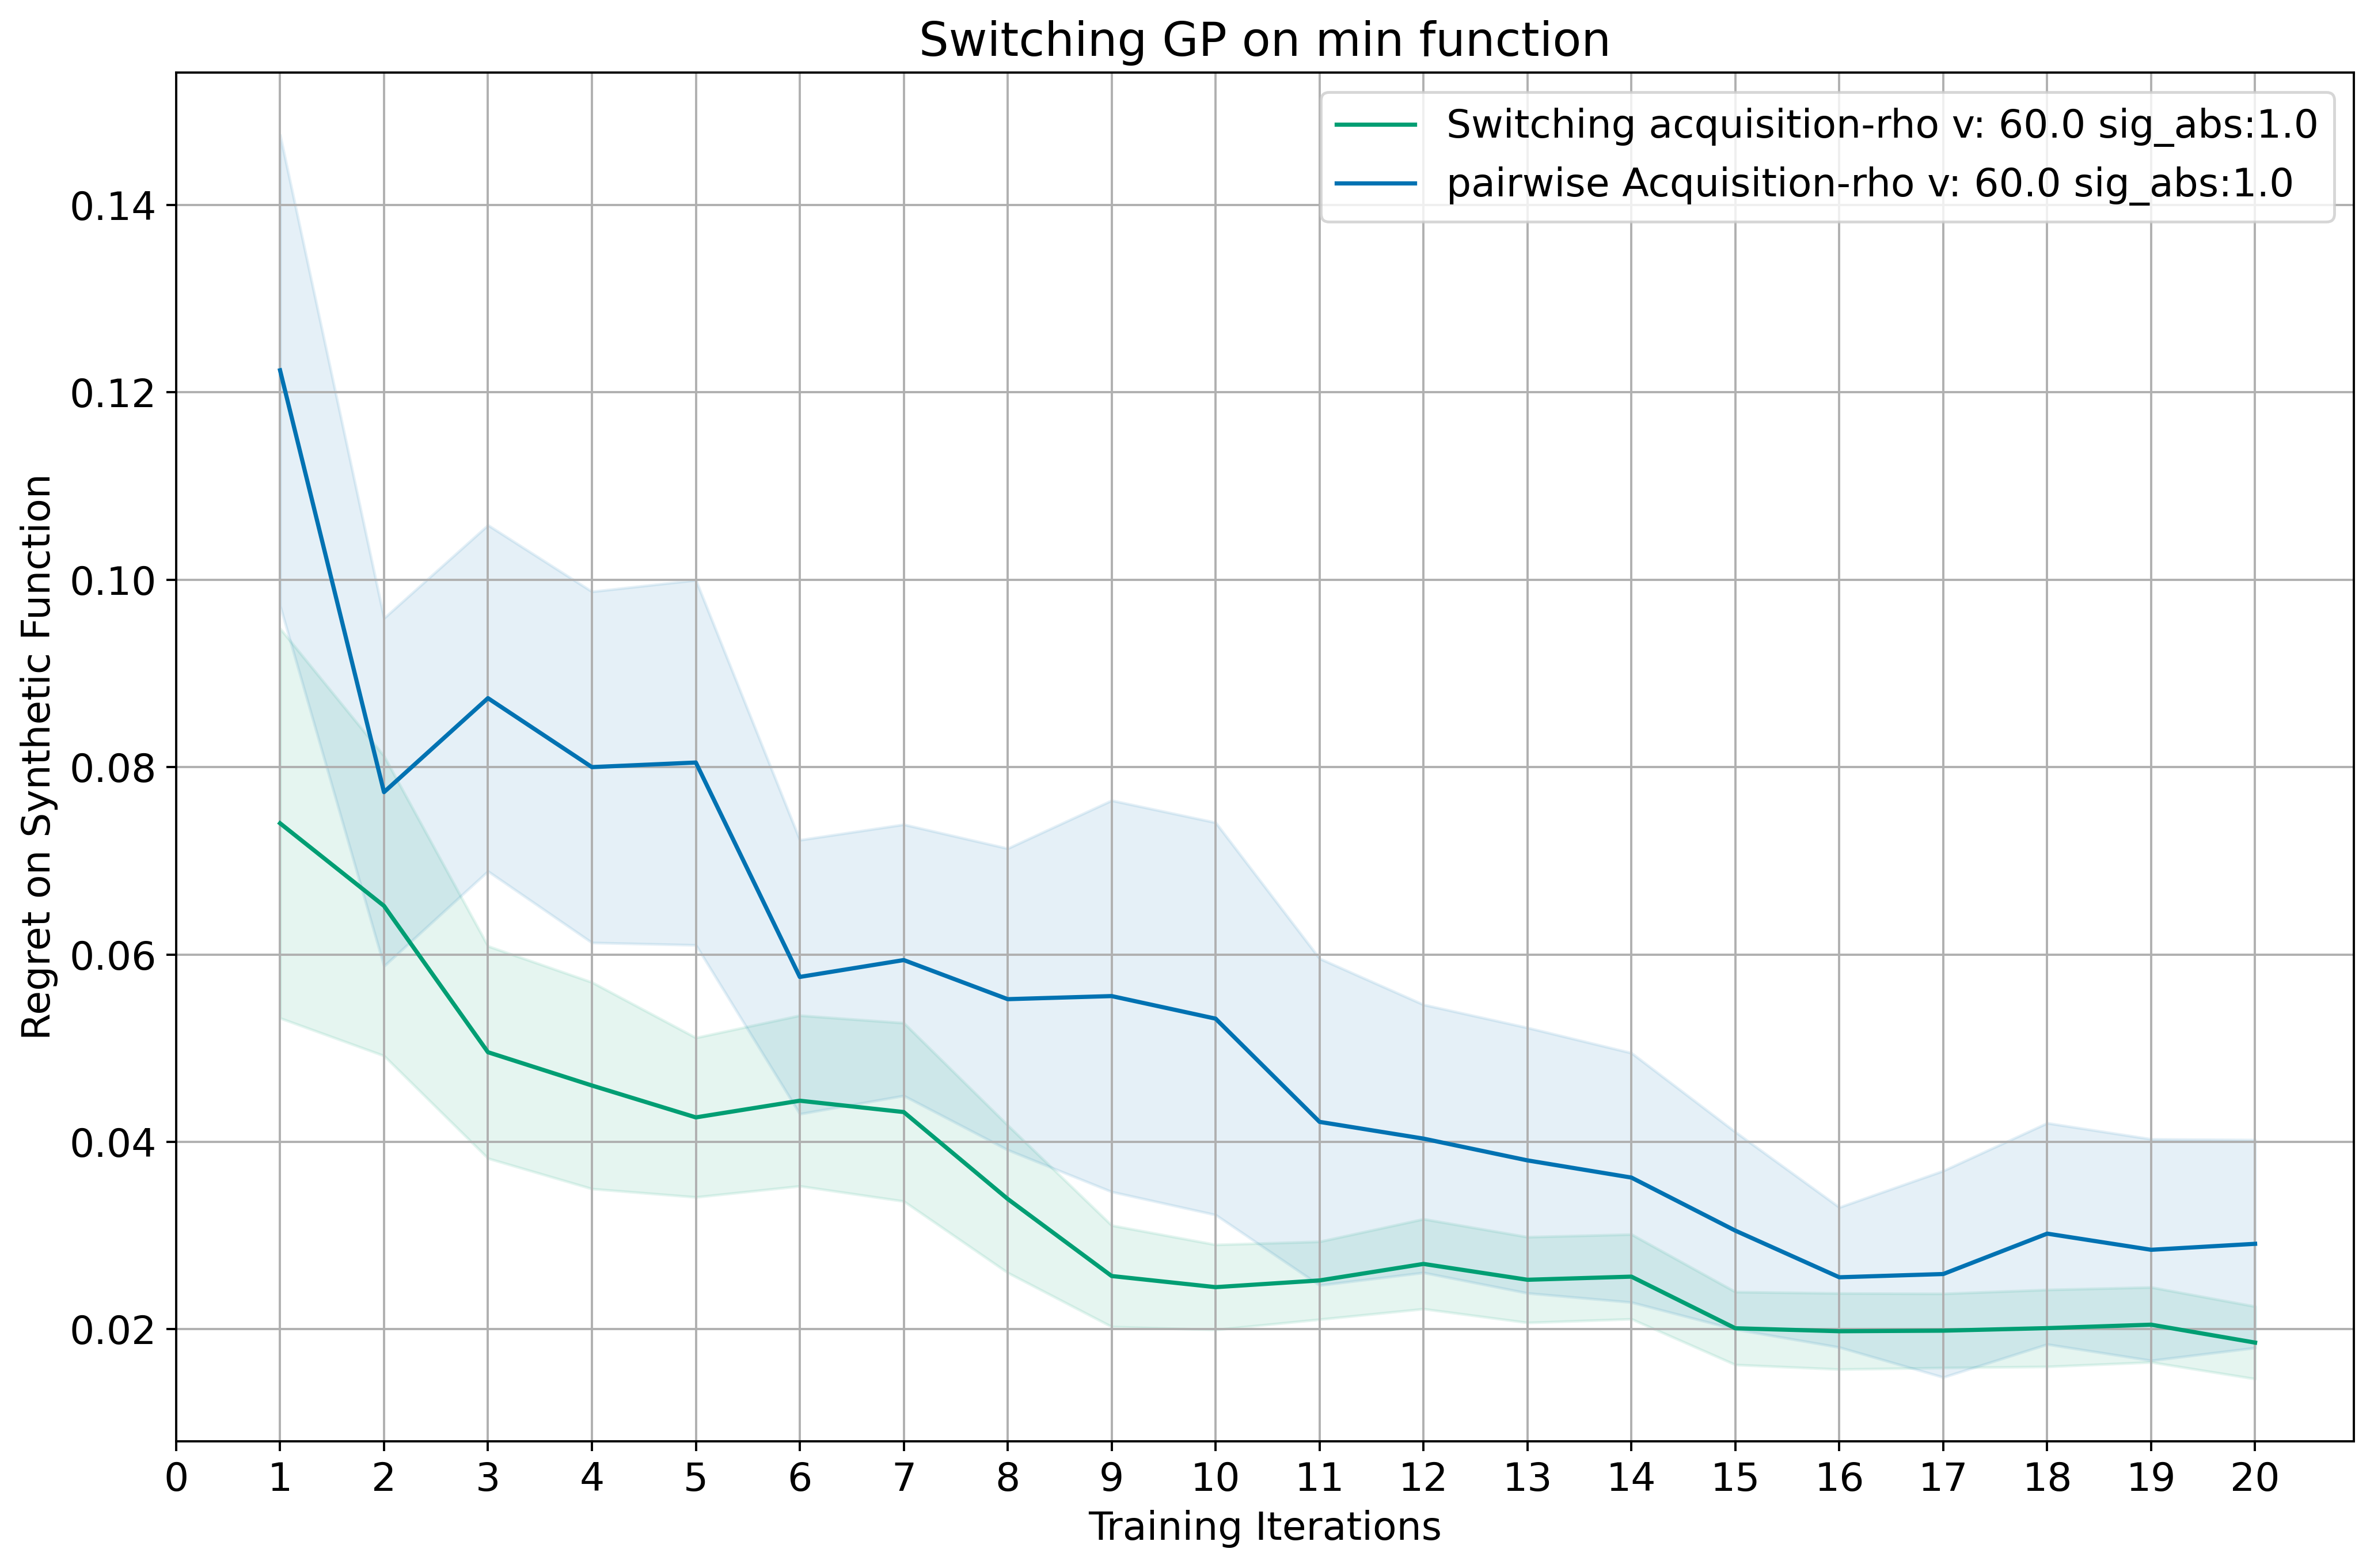

In [17]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'UCB', 'SW_ACQ_RHO', 'SW_ACQ_LL', 'SW_ACQ_EPIC', 'SW_ACQ_SPEAR']
selectors = ['SW_ACQ_RHO', 'ACQ_RHO']
#selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

after_time = '2024-09-01_00-00-00'
before_time = '2025-08-30_00-00-00'
before_time = '2024-09-03_00-00-00'
after_time = '2024-08-29_00-00-00'


pareto='False'

models = ['gp']
user = 'human_choice'
select = 'switch'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
#selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']

colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00', '#00ff00', '#0000FF']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(12,8), dpi=350)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

vs=['60.0']
#vs=['160.0']
sigpairs=['1.0']
#sigabss=['0.1','0.2', '0.5','1.0']
sigabss=['1.0']

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                for m, v in enumerate(vs):
                    for n, sigpair in enumerate(sigpairs):
                        for o, sigabs in enumerate(sigabss):
                                
                            glob_check = directory+'AT_'+selector+'_model_'+model+'_'+select+'_user_'+user+'_fake_'+fake_func+'_pareto_'+pareto+'_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair+'_env2*/train_data.npz'

                            print('\t'+glob_check)
                            files = glob(glob_check)
                            files = filter_by_time(files, before=before_time, after=after_time)

                            if len(files) > 0:
                            #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                            #     files = glob(glob_check)


                                score_diffs = np.empty((0,21))
                                for file in files:
                                    data_file = np.load(file)
                                    print(file)
                                    #print(list(data_file.keys()))
                                    score_diff = np.mean(data_file['score_diff'], axis=(2,))
                                    #score_diff = data_file['avg_correct']
                                    score_diffs = np.append(score_diffs, score_diff, axis=0)

                                print(score_diffs.shape)
                                all_score_diffs.append(score_diffs)

                                itr_to_show = 21

                                mean_diffs = np.mean(score_diffs, axis=0)
                                std_diffs = np.std(score_diffs, axis=0)
                                print('standard diffs shape: '+ str(score_diffs.shape))
                                std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                                print(mean_diffs.shape)

                                x = np.arange(1,itr_to_show)

                                sigma_to_plot = 1.0
                                #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                                plt.gca().fill_between(x, \
                                                        mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                        mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                        color=colors_dict[selector], \
                                                        alpha=0.1, \
                                                        label='_nolegend_')
                                plt.plot(x, mean_diffs[1:itr_to_show], color=colors_dict[selector], linestyle='-')

                                selector_text = ''
                                if selector == 'SGV_UCB':
                                    selector_text = 'SGV-UCB'
                                elif selector == 'UCB':
                                    selector_text = 'UCB'
                                elif selector == 'MUTUAL_INFO':
                                    selector_text = 'Mutual Information'
                                elif selector == 'RANDOM':
                                    selector_text = 'Random'
                                elif selector == 'BAYES_INFO_GAIN_PROBIT':
                                    selector_text = 'Reward Optimization'
                                elif selector == 'ACQ_RHO':
                                    selector_text = 'pairwise Acquisition-rho'
                                elif selector == 'SW_ACQ_RHO':
                                    selector_text = 'Switching acquisition-rho'
                                elif selector == 'ACQ_LL' or selector == 'SW_ACQ_LL':
                                    selector_text = 'Acquisition loglikelihood'
                                elif selector == 'ACQ_EPIC' or selector == 'SW_ACQ_EPIC':
                                    selector_text = 'Acquisition EPICish'
                                elif selector == 'ACQ_SP':
                                    selector_text = 'Acquisition Spearman old'
                                elif selector == 'ACQ_SPEAR' or selector == 'SW_ACQ_SPEAR':
                                    selector_text = 'Acquisition Spearman'
                                #leg = selector_text + ' Query Selection'
                                leg = selector_text+' v: ' + v + ' sig_abs:' + sigabs
                                leg_txt.append(leg)

                                color_idx += 1
                                line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Switching GP on min function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training_abs.png')

plt.show()

	results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env*/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env4_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env1_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env2_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env0_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env8_2024-09-03_15-23-23/tr

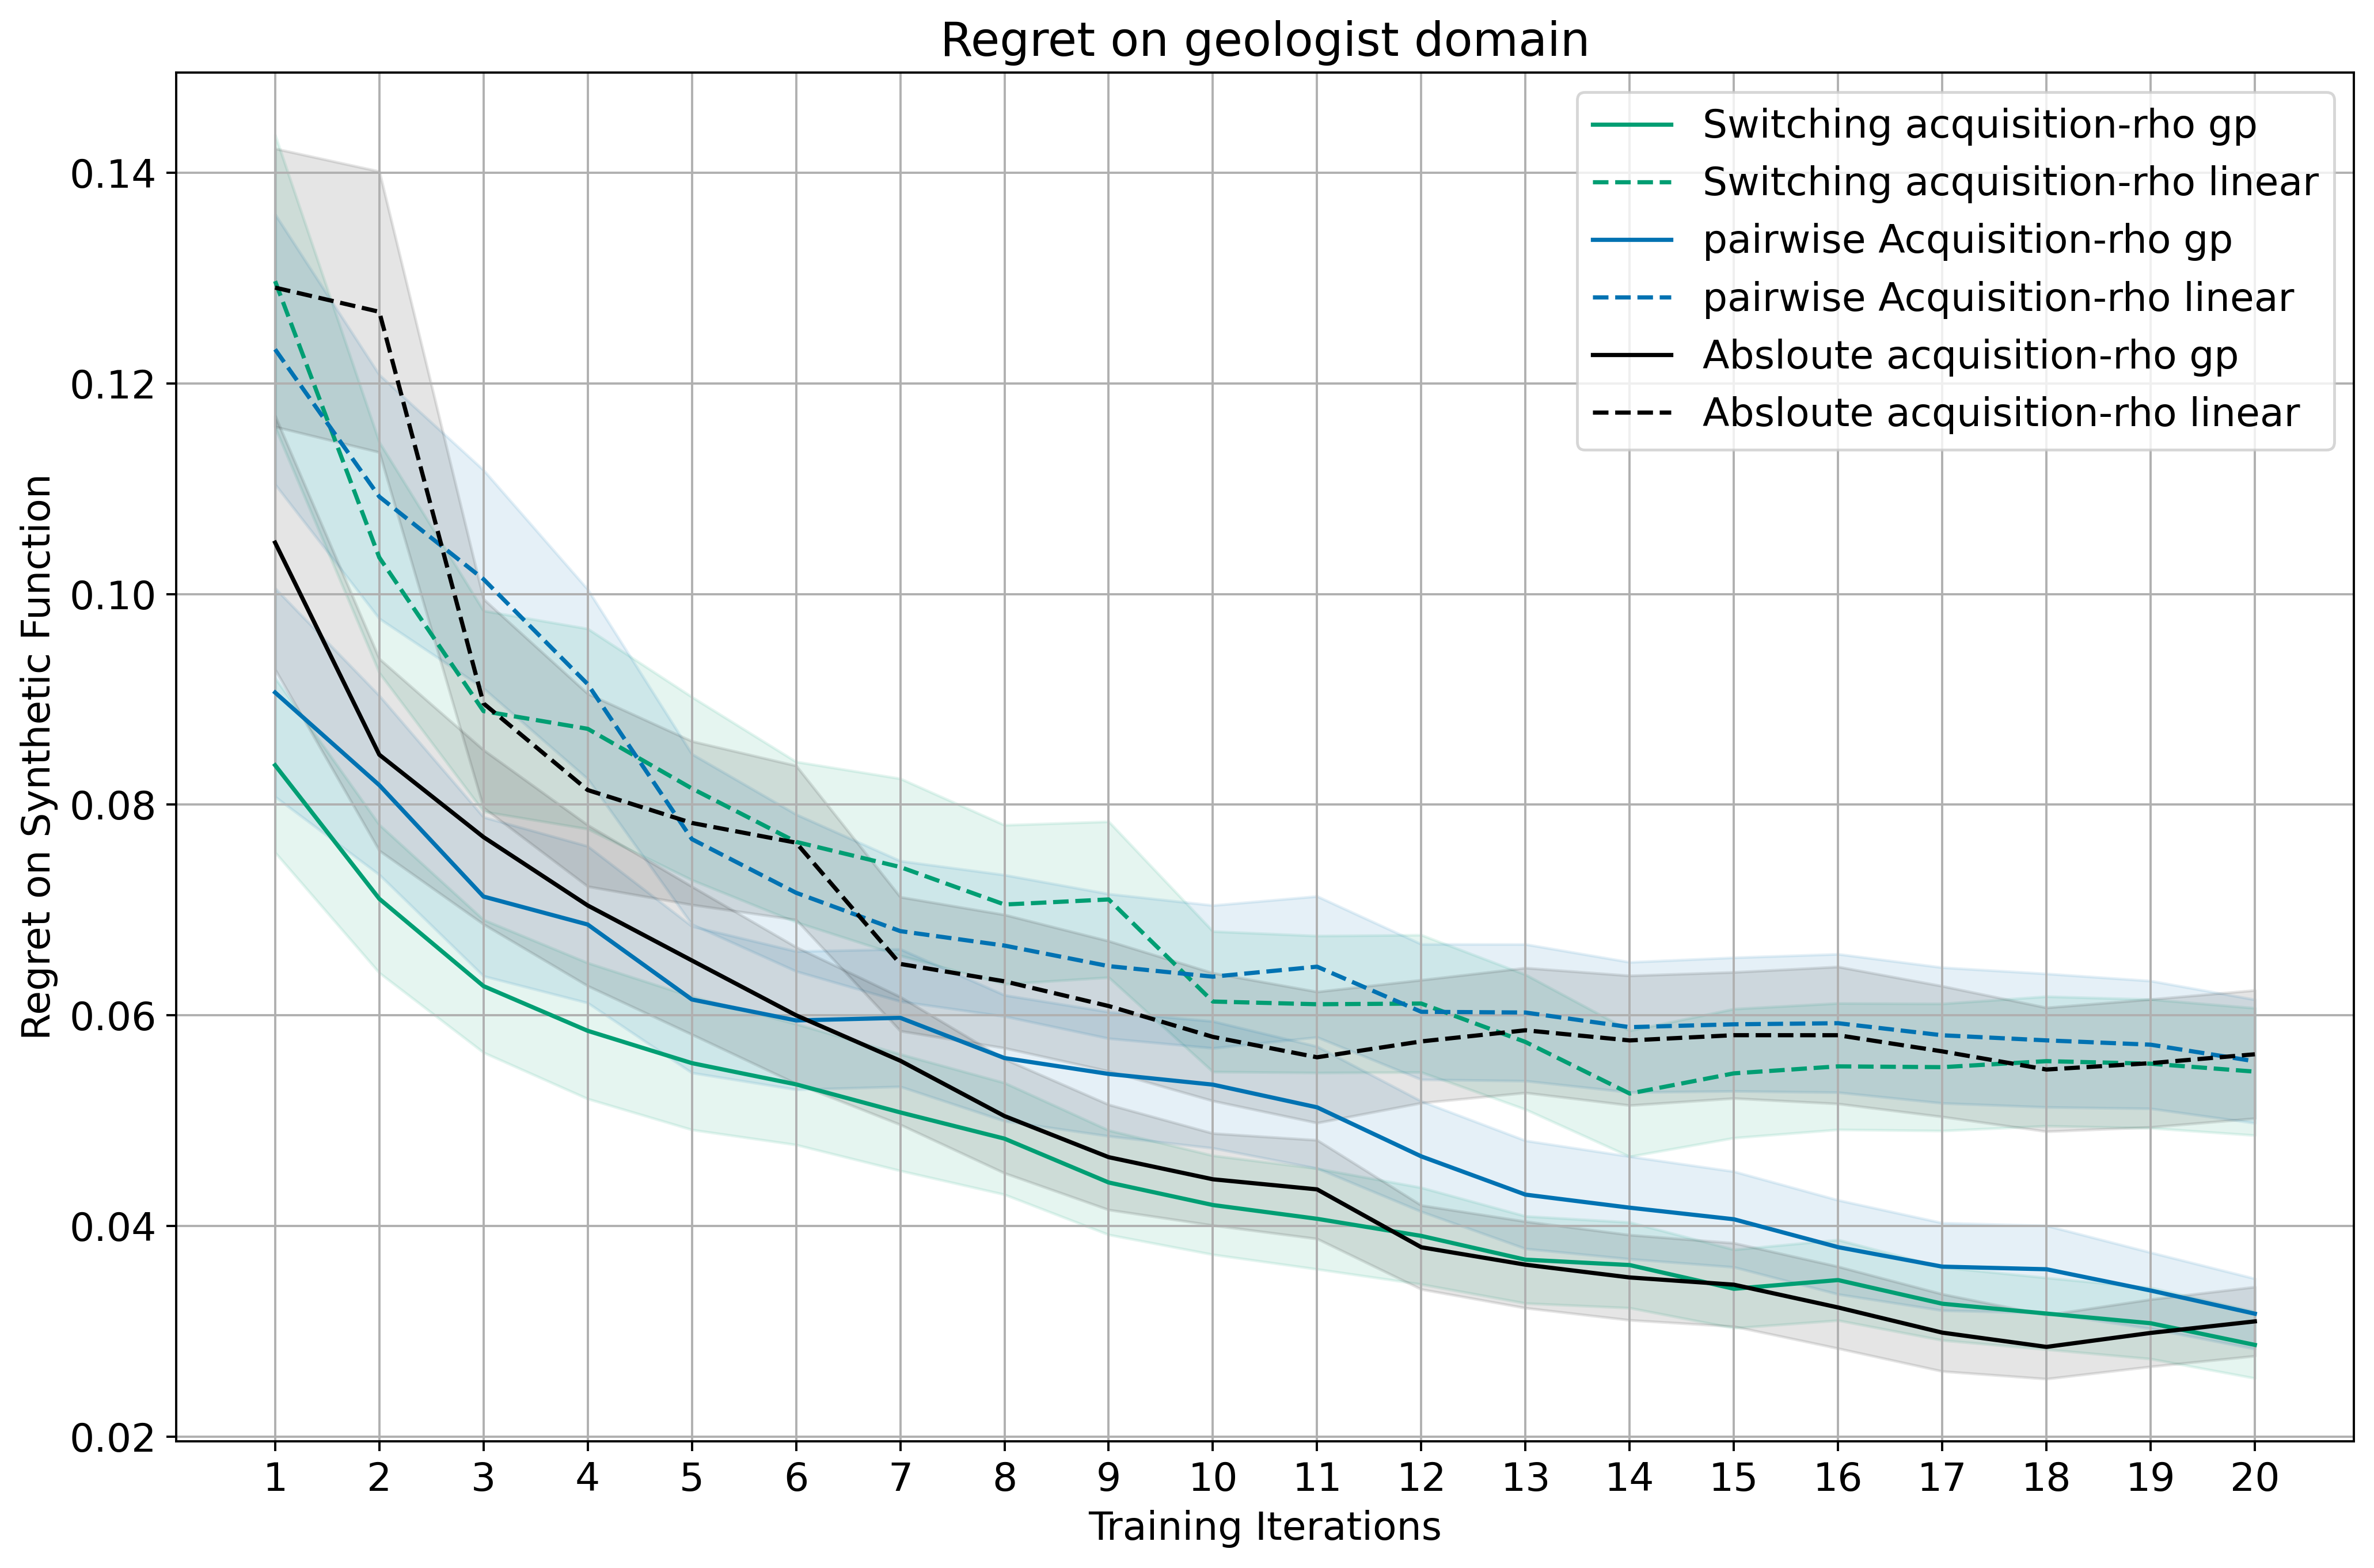

In [27]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'UCB', 'SW_ACQ_RHO', 'SW_ACQ_LL', 'SW_ACQ_EPIC', 'SW_ACQ_SPEAR']
selectors = ['SW_ACQ_RHO', 'ACQ_RHO', 'ABS_ACQ_RHO']
#selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

after_time = '2024-09-01_00-00-00'
before_time = '2025-08-30_00-00-00'


pareto='False'

models = ['gp', 'linear']
user = 'human_choice'
select = 'switch'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
#selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']

colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00', '#00ff00', '#0000FF']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(12,8), dpi=350)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

query_sizes = ['2']
vs=['60.0']
#vs=['160.0']
sigpairs=['1.0']
#sigabss=['0.1','0.2', '0.5','1.0']
sigabss=['1.0']
rbfls = ['0.8']
rbfsigs = ['1.0']


for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                for m, v in enumerate(vs):
                    for n, sigpair in enumerate(sigpairs):
                        for o, sigabs in enumerate(sigabss):
                            for rbfl in rbfls:
                                for rbfsig in rbfsigs:
                                    for query_size in query_sizes:
                                    
                                        glob_check = directory+'AT_'+selector+'_model_'+model+'_'+select+'_user_'+user+query_size+'_fake_'+fake_func+'_pareto_'+pareto+'_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair+'_rbfl_'+rbfl+'_rbfsig_'+rbfsig+'_env*/train_data.npz'

                                        print('\t'+glob_check)
                                        files = glob(glob_check)
                                        files = filter_by_time(files, before=before_time, after=after_time)

                                        if len(files) > 0:
                                        #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                                        #     files = glob(glob_check)


                                            score_diffs = np.empty((0,21))
                                            for file in files:
                                                data_file = np.load(file)
                                                print(file)
                                                #print(list(data_file.keys()))
                                                score_diff = np.mean(data_file['score_diff'], axis=(2,))
                                                #score_diff = data_file['avg_correct']
                                                score_diffs = np.append(score_diffs, score_diff, axis=0)

                                            print(score_diffs.shape)
                                            all_score_diffs.append(score_diffs)

                                            itr_to_show = 21

                                            mean_diffs = np.mean(score_diffs, axis=0)
                                            std_diffs = np.std(score_diffs, axis=0)
                                            print('standard diffs shape: '+ str(score_diffs.shape))
                                            std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                                            print(mean_diffs.shape)

                                            x = np.arange(1,itr_to_show)

                                            sigma_to_plot = 1.0
                                            #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                                            plt.gca().fill_between(x, \
                                                                    mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                                    mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                                    color=colors_dict[selector], \
                                                                    alpha=0.1, \
                                                                    label='_nolegend_')
                                            plt.plot(x, mean_diffs[1:itr_to_show], color=colors_dict[selector], linestyle=model_style_dict[model])

                                            selector_text = ''
                                            if selector == 'SGV_UCB':
                                                selector_text = 'SGV-UCB'
                                            elif selector == 'UCB':
                                                selector_text = 'UCB'
                                            elif selector == 'MUTUAL_INFO':
                                                selector_text = 'Mutual Information'
                                            elif selector == 'RANDOM':
                                                selector_text = 'Random'
                                            elif selector == 'BAYES_INFO_GAIN_PROBIT':
                                                selector_text = 'Reward Optimization'
                                            elif selector == 'ACQ_RHO':
                                                selector_text = 'pairwise Acquisition-rho'
                                            elif selector == 'SW_ACQ_RHO':
                                                selector_text = 'Switching acquisition-rho'
                                            elif selector == 'ABS_ACQ_RHO':
                                                selector_text = 'Absloute acquisition-rho'
                                            elif selector == 'ACQ_LL' or selector == 'SW_ACQ_LL':
                                                selector_text = 'Acquisition loglikelihood'
                                            elif selector == 'ACQ_EPIC' or selector == 'SW_ACQ_EPIC':
                                                selector_text = 'Acquisition EPICish'
                                            elif selector == 'ACQ_SP':
                                                selector_text = 'Acquisition Spearman old'
                                            elif selector == 'ACQ_SPEAR' or selector == 'SW_ACQ_SPEAR':
                                                selector_text = 'Acquisition Spearman'
                                            #leg = selector_text + ' Query Selection'
                                            leg = selector_text+' '+ model
                                            leg_txt.append(leg)

                                            color_idx += 1
                                            line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Regret on geologist domain')
plt.xticks(range(1,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training_abs.png')

plt.show()

	results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env*/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env4_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env1_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env2_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env0_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env8_2024-09-03_15-23-23/tr

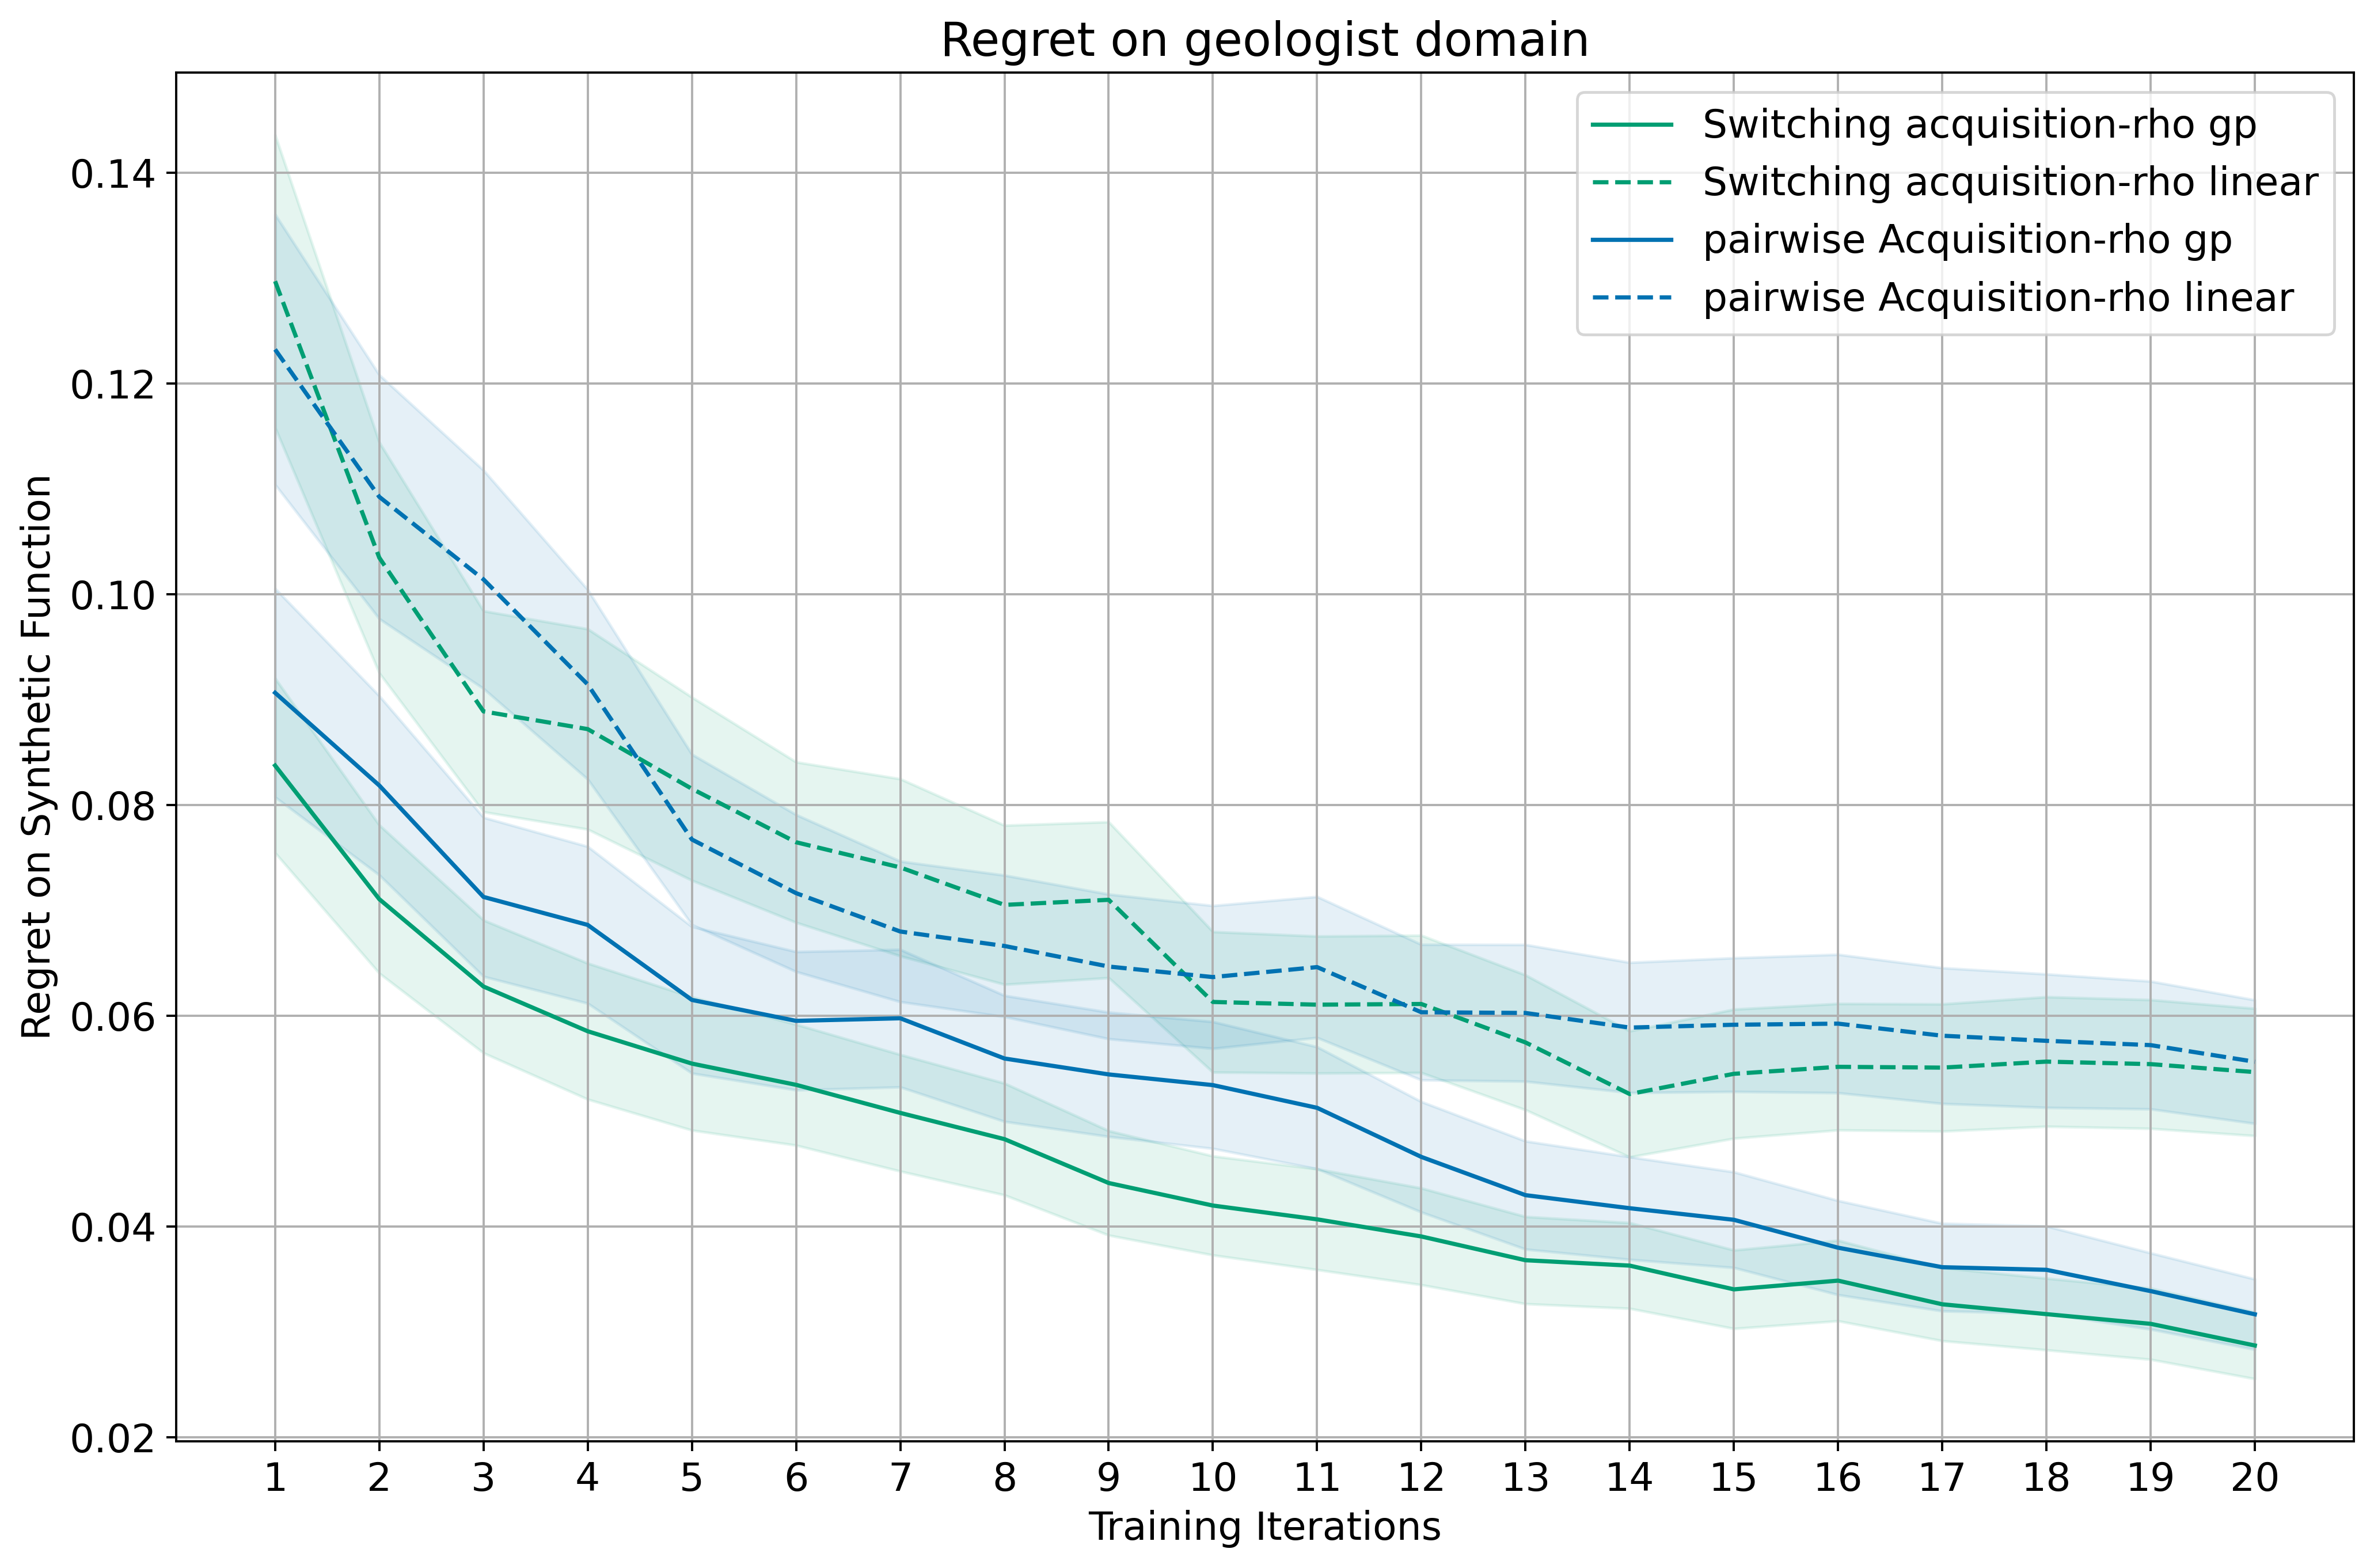

In [28]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'UCB', 'SW_ACQ_RHO', 'SW_ACQ_LL', 'SW_ACQ_EPIC', 'SW_ACQ_SPEAR']
selectors = ['SW_ACQ_RHO', 'ACQ_RHO']
#selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

after_time = '2024-09-01_00-00-00'
before_time = '2025-08-30_00-00-00'


pareto='False'

models = ['gp', 'linear']
user = 'human_choice'
select = 'switch'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
#selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']

colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00', '#00ff00', '#0000FF']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(12,8), dpi=350)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

query_sizes = ['2']
vs=['60.0']
#vs=['160.0']
sigpairs=['1.0']
#sigabss=['0.1','0.2', '0.5','1.0']
sigabss=['1.0']
rbfls = ['0.8']
rbfsigs = ['1.0']


for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                for m, v in enumerate(vs):
                    for n, sigpair in enumerate(sigpairs):
                        for o, sigabs in enumerate(sigabss):
                            for rbfl in rbfls:
                                for rbfsig in rbfsigs:
                                    for query_size in query_sizes:
                                    
                                        glob_check = directory+'AT_'+selector+'_model_'+model+'_'+select+'_user_'+user+query_size+'_fake_'+fake_func+'_pareto_'+pareto+'_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair+'_rbfl_'+rbfl+'_rbfsig_'+rbfsig+'_env*/train_data.npz'

                                        print('\t'+glob_check)
                                        files = glob(glob_check)
                                        files = filter_by_time(files, before=before_time, after=after_time)

                                        if len(files) > 0:
                                        #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                                        #     files = glob(glob_check)


                                            score_diffs = np.empty((0,21))
                                            for file in files:
                                                data_file = np.load(file)
                                                print(file)
                                                #print(list(data_file.keys()))
                                                score_diff = np.mean(data_file['score_diff'], axis=(2,))
                                                #score_diff = data_file['avg_correct']
                                                score_diffs = np.append(score_diffs, score_diff, axis=0)

                                            print(score_diffs.shape)
                                            all_score_diffs.append(score_diffs)

                                            itr_to_show = 21

                                            mean_diffs = np.mean(score_diffs, axis=0)
                                            std_diffs = np.std(score_diffs, axis=0)
                                            print('standard diffs shape: '+ str(score_diffs.shape))
                                            std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                                            print(mean_diffs.shape)

                                            x = np.arange(1,itr_to_show)

                                            sigma_to_plot = 1.0
                                            #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                                            plt.gca().fill_between(x, \
                                                                    mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                                    mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                                    color=colors_dict[selector], \
                                                                    alpha=0.1, \
                                                                    label='_nolegend_')
                                            plt.plot(x, mean_diffs[1:itr_to_show], color=colors_dict[selector], linestyle=model_style_dict[model])

                                            selector_text = ''
                                            if selector == 'SGV_UCB':
                                                selector_text = 'SGV-UCB'
                                            elif selector == 'UCB':
                                                selector_text = 'UCB'
                                            elif selector == 'MUTUAL_INFO':
                                                selector_text = 'Mutual Information'
                                            elif selector == 'RANDOM':
                                                selector_text = 'Random'
                                            elif selector == 'BAYES_INFO_GAIN_PROBIT':
                                                selector_text = 'Reward Optimization'
                                            elif selector == 'ACQ_RHO':
                                                selector_text = 'pairwise Acquisition-rho'
                                            elif selector == 'SW_ACQ_RHO':
                                                selector_text = 'Switching acquisition-rho'
                                            elif selector == 'ABS_ACQ_RHO':
                                                selector_text = 'Absloute acquisition-rho'
                                            elif selector == 'ACQ_LL' or selector == 'SW_ACQ_LL':
                                                selector_text = 'Acquisition loglikelihood'
                                            elif selector == 'ACQ_EPIC' or selector == 'SW_ACQ_EPIC':
                                                selector_text = 'Acquisition EPICish'
                                            elif selector == 'ACQ_SP':
                                                selector_text = 'Acquisition Spearman old'
                                            elif selector == 'ACQ_SPEAR' or selector == 'SW_ACQ_SPEAR':
                                                selector_text = 'Acquisition Spearman'
                                            #leg = selector_text + ' Query Selection'
                                            leg = selector_text+' '+ model
                                            leg_txt.append(leg)

                                            color_idx += 1
                                            line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Regret on geologist domain')
plt.xticks(range(1,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training_abs.png')

plt.show()

	results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env*/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env4_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env1_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env2_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env0_2024-09-03_15-23-23/train_data.npz
results/AT_SW_ACQ_RHO_model_gp_switch_user_human_choice2_fake_min_pareto_False_no_v_60.0_sigabs_1.0_sigpair_1.0_rbfl_0.8_rbfsig_1.0_env8_2024-09-03_15-23-23/tr

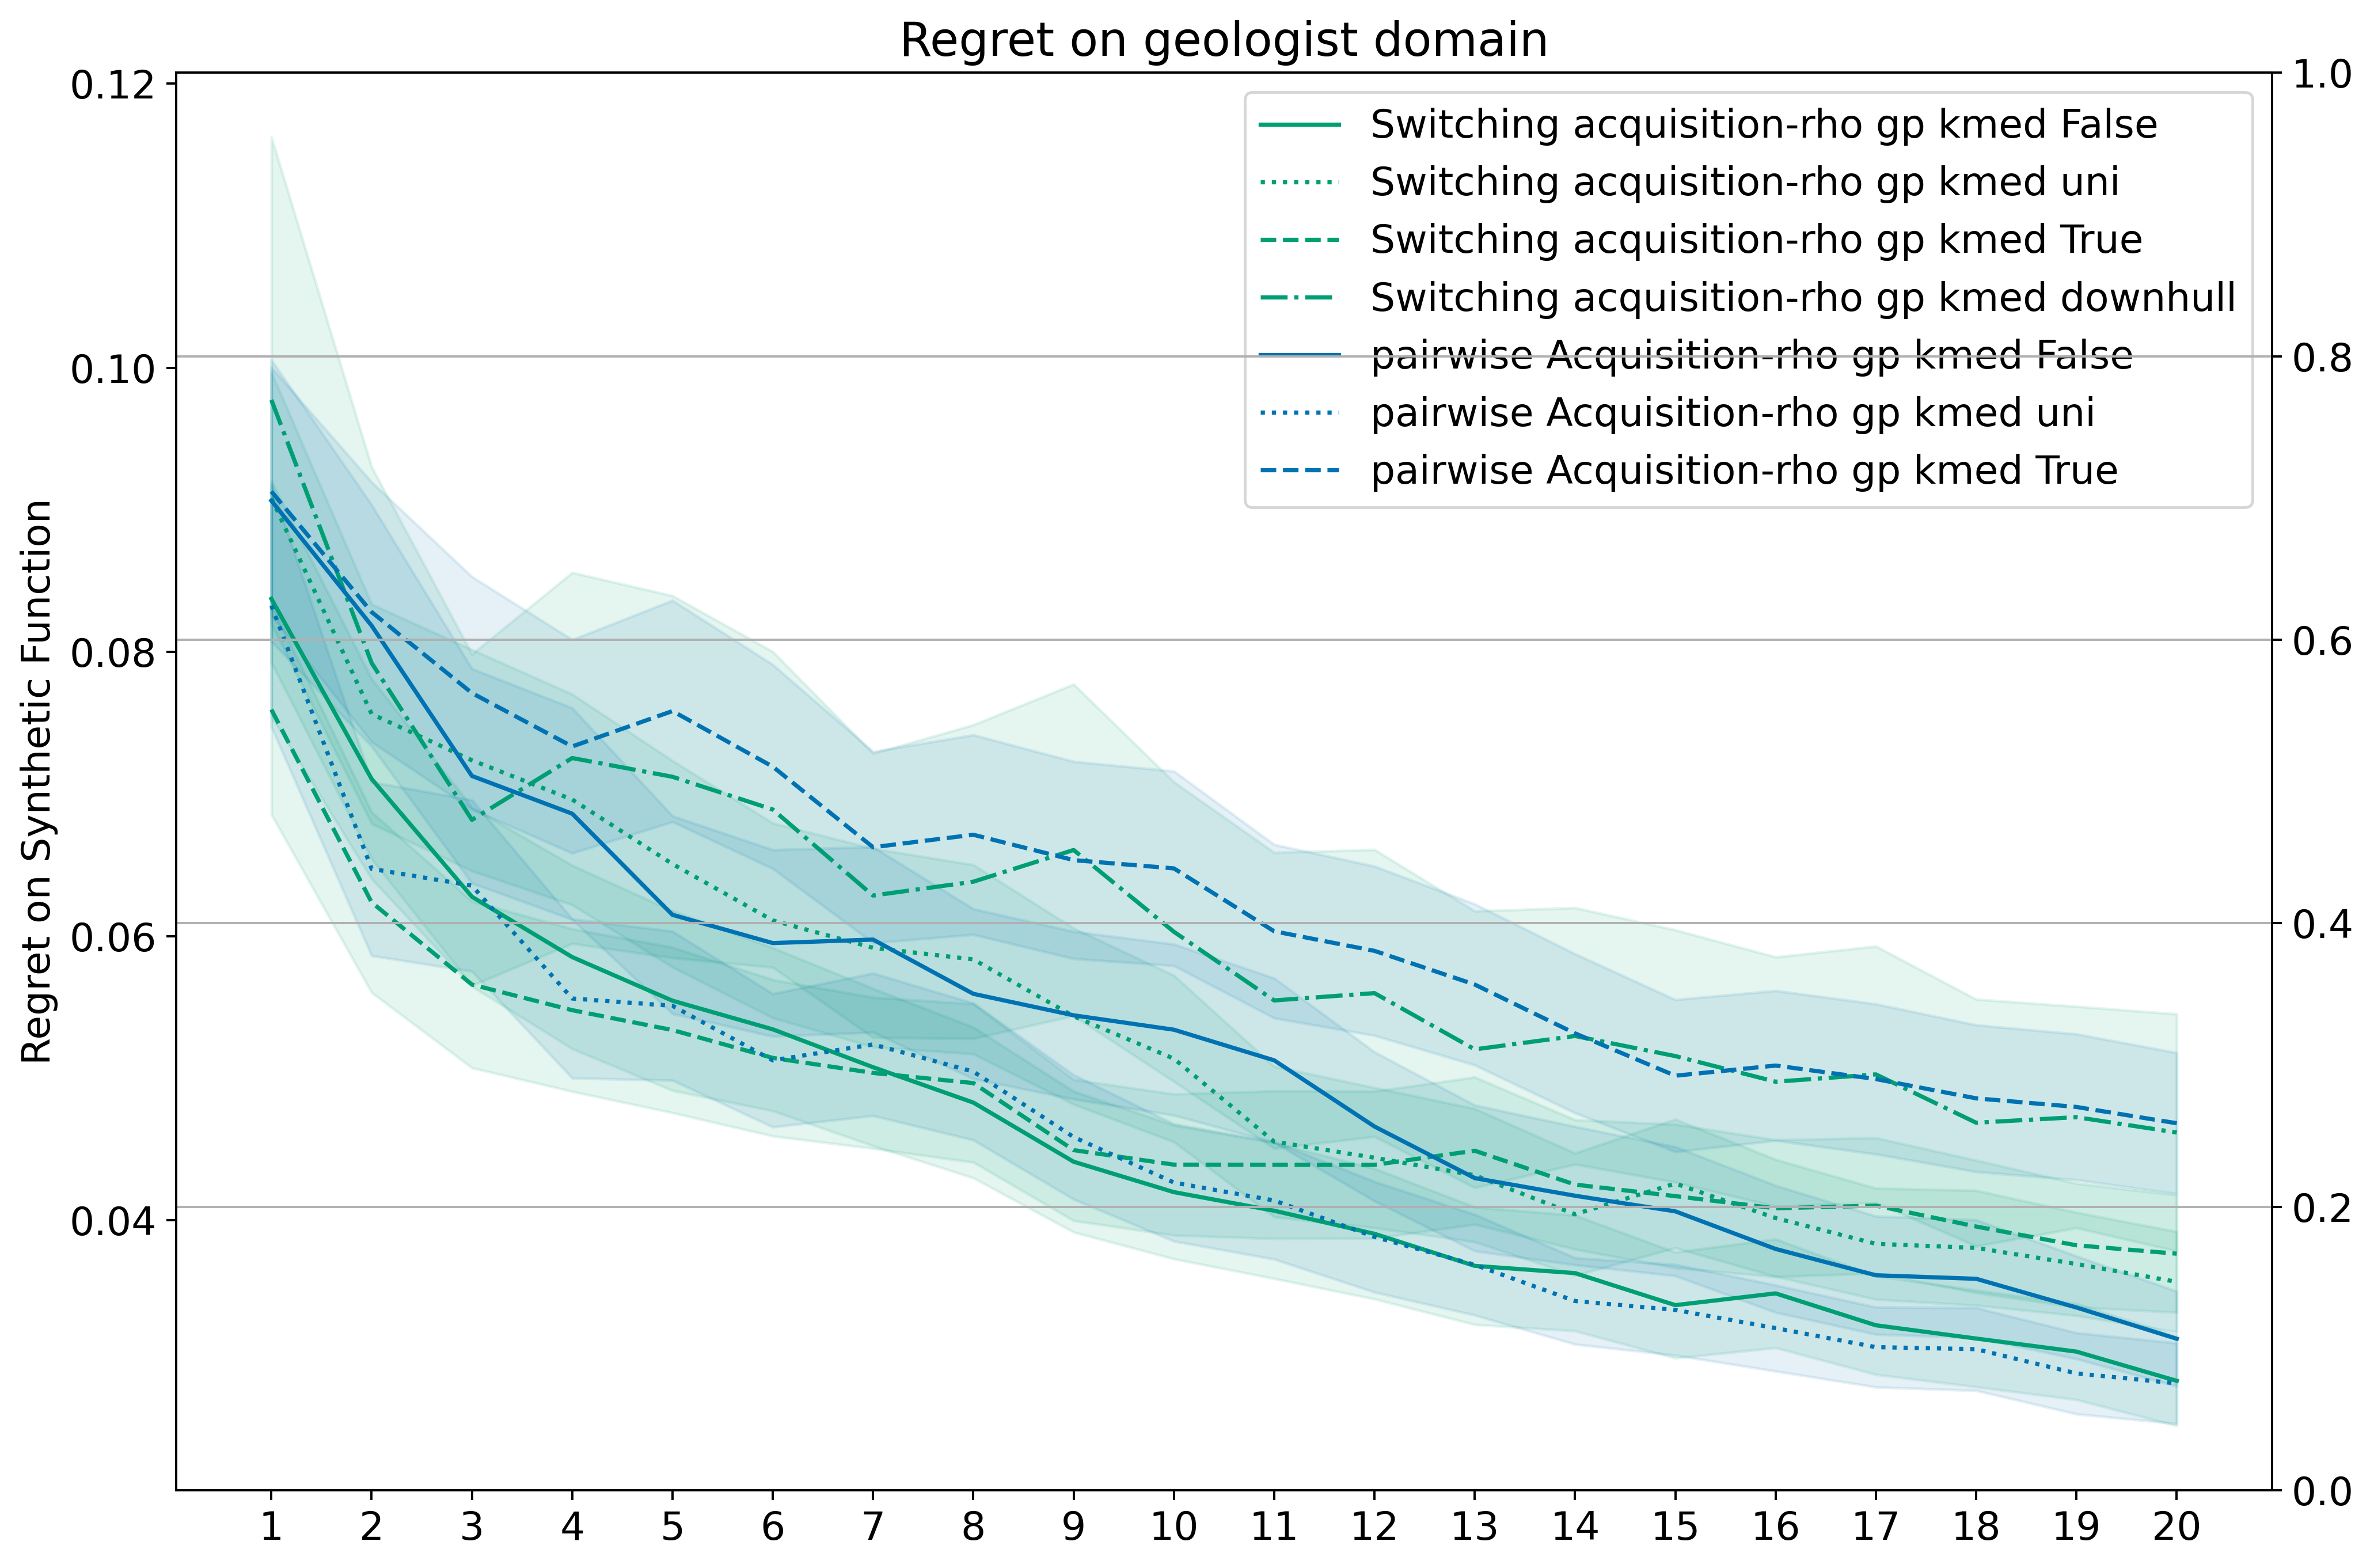

In [81]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'UCB', 'SW_ACQ_RHO', 'SW_ACQ_LL', 'SW_ACQ_EPIC', 'SW_ACQ_SPEAR']
selectors = ['SW_ACQ_RHO', 'ACQ_RHO']
#selectors = ['ACQ_RHO']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

after_time = '2024-09-01_00-00-00'
before_time = '2025-08-30_00-00-00'


pareto='False'

models = ['gp']
user = 'human_choice'
select = 'switch'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
#selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']

colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00', '#00ff00', '#0000FF']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(12,8), dpi=350)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

show_avg_sel = False

query_sizes = ['2']
vs=['60.0']
#vs=['160.0']
sigpairs=['1.0']
#sigabss=['0.1','0.2', '0.5','1.0']
sigabss=['1.0']
rbfls = ['0.8']
rbfsigs = ['1.0']
kmeds = ['False', 'uni', 'True', 'downhull']

kmed_style_dict = {'True': '--',
                    'False': '-',
                    'uni': ':', 
                    'downhull': '-.'}

ax = plt.gca()
ax2 = ax.twinx()

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                for m, v in enumerate(vs):
                    for n, sigpair in enumerate(sigpairs):
                        for o, sigabs in enumerate(sigabss):
                            for rbfl in rbfls:
                                for rbfsig in rbfsigs:
                                    for query_size in query_sizes:
                                        for kmed in kmeds:
                                            kmed_str = ''
                                            if kmed != 'False':
                                                kmed_str = '_kmed_'+str(kmed)
                                            glob_check = directory+'AT_'+selector+'_model_'+model+'_'+select+'_user_'+user+query_size+'_fake_'+fake_func+'_pareto_'+pareto+kmed_str+'_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair+'_rbfl_'+rbfl+'_rbfsig_'+rbfsig+'_env*/train_data.npz'

                                            print('\t'+glob_check)
                                            files = glob(glob_check)
                                            files = filter_by_time(files, before=before_time, after=after_time)

                                            if len(files) > 0:
                                            #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                                            #     files = glob(glob_check)


                                                score_diffs = np.empty((0,21))
                                                avg_selections = np.empty((0, 21))
                                                for file in files:
                                                    data_file = np.load(file)
                                                    print(file)
                                                    #print(list(data_file.keys()))
                                                    score_diff = np.mean(data_file['score_diff'], axis=(2,))
                                                    
                                                    #score_diff = data_file['avg_correct']
                                                    score_diffs = np.append(score_diffs, score_diff, axis=0)
                                                    
                                                    if 'query_type_is_abs' in data_file:
                                                        avg_selection = data_file['query_type_is_abs']
                                                        avg_selections = np.append(avg_selections, avg_selection, axis=0)

                                                print(score_diffs.shape)
                                                all_score_diffs.append(score_diffs)

                                                itr_to_show = 21

                                                mean_diffs = np.mean(score_diffs, axis=0)
                                                std_diffs = np.std(score_diffs, axis=0)
                                                print('standard diffs shape: '+ str(score_diffs.shape))
                                                std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                                                print(mean_diffs.shape)

                                                if 'query_type_is_abs' in data_file:
                                                    mean_sels = np.mean(avg_selections, axis=0)
                                                    std_sels = np.std(avg_selections, axis=0)
                                                    std_error_mean_sels = std_sels / np.sqrt(avg_selections.shape[0])
                                                
                                                x = np.arange(1,itr_to_show)

                                                sigma_to_plot = 1.0
                                                #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                                                
                                                
                                                c1 = colors_dict[selector]
                                                s1 = kmed_style_dict[kmed]
                                                c2 = colors_dict[selector]
                                                s2 = '-.'
                                                
                                                ax.fill_between(x, \
                                                                        mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                                        mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                                        color=c1, \
                                                                        alpha=0.1, \
                                                                        label='_nolegend_')
                                                ax.plot(x, mean_diffs[1:itr_to_show], color=c1, linestyle=s1)

                                                if 'query_type_is_abs' in data_file and show_avg_sel:
#                                                     ax2.fill_between(x, \
#                                                                             mean_sels[1:itr_to_show]-(sigma_to_plot*std_error_mean_sels[1:itr_to_show]), \
#                                                                             mean_sels[1:itr_to_show]+(sigma_to_plot*std_error_mean_sels[1:itr_to_show]), \
#                                                                             color=c1, \
#                                                                             alpha=0.1, \
#                                                                             label='_nolegend_')
                                                    ax2.plot(x, mean_sels[1:itr_to_show], color=c2, linestyle=s2, label='_nolegend_')
                                                    ax2.set_ylabel('Selecting pair or abs abs=1, pair=0')
                                                
                                                selector_text = ''
                                                if selector == 'SGV_UCB':
                                                    selector_text = 'SGV-UCB'
                                                elif selector == 'UCB':
                                                    selector_text = 'UCB'
                                                elif selector == 'MUTUAL_INFO':
                                                    selector_text = 'Mutual Information'
                                                elif selector == 'RANDOM':
                                                    selector_text = 'Random'
                                                elif selector == 'BAYES_INFO_GAIN_PROBIT':
                                                    selector_text = 'Reward Optimization'
                                                elif selector == 'ACQ_RHO':
                                                    selector_text = 'pairwise Acquisition-rho'
                                                elif selector == 'SW_ACQ_RHO':
                                                    selector_text = 'Switching acquisition-rho'
                                                elif selector == 'ABS_ACQ_RHO':
                                                    selector_text = 'Absloute acquisition-rho'
                                                elif selector == 'ACQ_LL' or selector == 'SW_ACQ_LL':
                                                    selector_text = 'Acquisition loglikelihood'
                                                elif selector == 'ACQ_EPIC' or selector == 'SW_ACQ_EPIC':
                                                    selector_text = 'Acquisition EPICish'
                                                elif selector == 'ACQ_SP':
                                                    selector_text = 'Acquisition Spearman old'
                                                elif selector == 'ACQ_SPEAR' or selector == 'SW_ACQ_SPEAR':
                                                    selector_text = 'Acquisition Spearman'
                                                #leg = selector_text + ' Query Selection'
                                                leg = selector_text+' '+ model + ' kmed ' + kmed
                                                leg_txt.append(leg)

                                                color_idx += 1
                                                line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
ax.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
ax.set_ylabel('Regret on Synthetic Function')
plt.title('Regret on geologist domain')
plt.xticks(range(1,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training_abs.png')

plt.show()